# Stock Price Prediction using Machine Learning in Python

## Importing Libraries

In [259]:
!pip install yahoo_fin
!pip install datetime
!pip install feedparser
!pip install pandas
!pip install requests
!pip install requests_html
!pip install pandas yfinance plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

<IPython.core.display.Javascript object>

In [261]:
import yahoo_fin.stock_info as si
# OR
from yahoo_fin.stock_info import*
import pandas as pd

<IPython.core.display.Javascript object>

In [262]:
# Pandas and NumPy for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
from matplotlib import pyplot as plt
# Seaborn for plotting and styling
import seaborn as sns
# # Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

<IPython.core.display.Javascript object>

In [263]:
# First, we just need to load the stock_info module from yahoo_fin.
# import stock_info module from yahoo_fin
from yahoo_fin import stock_info as si


<IPython.core.display.Javascript object>

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

## Importing Dataset

In [289]:
# Importing the prices of the stock
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=100000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('IOT', 
                      start=start_date, 
                      end=end_date, 
                      progress=True)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

In [290]:
# Creating  a well readable header label
for header in data.columns:
    header_replace = header.replace(
        " ", "_"
    )  # creates new header with "_" instead of " ".
    data.rename(
        {header: header_replace}, axis=1, inplace=True
    )  # sets new header as header made in line above

<IPython.core.display.Javascript object>

# Part I: Data Overview

In [291]:
# Observing the current 50 prices of the stock prices
print(data.tail(50))

          Date  Open  High   Low  Close  Adj_Close   Volume
209 2022-10-14 11.31 11.40 10.74  11.00      11.00  1569700
210 2022-10-17 11.20 11.52 10.97  11.02      11.02  1191700
211 2022-10-18 11.25 12.07 11.24  11.87      11.87   867000
212 2022-10-19 11.76 11.86 11.35  11.45      11.45  1142300
213 2022-10-20 11.39 12.02 11.34  11.53      11.53   685500
214 2022-10-21 11.42 11.54 11.08  11.49      11.49   963700
215 2022-10-24 11.50 11.67 11.05  11.48      11.48   678300
216 2022-10-25 11.50 12.47 11.50  12.31      12.31  1179900
217 2022-10-26 12.13 12.59 11.93  12.01      12.01   597700
218 2022-10-27 12.12 12.68 12.05  12.28      12.28   794200
219 2022-10-28 12.23 12.67 12.16  12.39      12.39   727400
220 2022-10-31 12.23 12.47 12.07  12.31      12.31  1270000
221 2022-11-01 12.57 12.68 11.83  11.84      11.84   927100
222 2022-11-02 11.84 11.84 10.53  10.60      10.60  1436100
223 2022-11-03 10.51 10.65 10.09  10.11      10.11  1059600
224 2022-11-04 10.30 10.40  9.40   9.67 

<IPython.core.display.Javascript object>

## Columns/Variable/Features of the Dataset

In [292]:
# Extracting the columns/variables of the dataset
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

<IPython.core.display.Javascript object>

## Observing the Dimention of the Dataset

In [293]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 259 rows and 7 columns.


<IPython.core.display.Javascript object>

## Data Types of the Dataset

In [294]:
# Checking the data types of the variables/columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       259 non-null    datetime64[ns]
 1   Open       259 non-null    float64       
 2   High       259 non-null    float64       
 3   Low        259 non-null    float64       
 4   Close      259 non-null    float64       
 5   Adj_Close  259 non-null    float64       
 6   Volume     259 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.3 KB


<IPython.core.display.Javascript object>

## Checking the Missing Values of the Dataset

In [295]:
# Checking for missing values in the dataset
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

<IPython.core.display.Javascript object>

In [296]:
# Checking the total number of missing values in the dataset
data.isnull().sum().sum()

0

<IPython.core.display.Javascript object>

## Checking the Duplicates in the Dataset

In [297]:
# checking for duplicate values
print("There are about: ", data.duplicated().sum(), "dupplicates in the dataset")

There are about:  0 dupplicates in the dataset


<IPython.core.display.Javascript object>

## Removing Duplicates from the Dataset

In [298]:
# dropping duplicate entries from the data
data.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       259 non-null    datetime64[ns]
 1   Open       259 non-null    float64       
 2   High       259 non-null    float64       
 3   Low        259 non-null    float64       
 4   Close      259 non-null    float64       
 5   Adj_Close  259 non-null    float64       
 6   Volume     259 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.3 KB


<IPython.core.display.Javascript object>

## Statistical Summary of the Dataset

In [299]:
# let's view the statistical summary of minimum numerical columns in the data
data.describe(include=np.number).T.style.highlight_min(color="green", axis=0)

,count,mean,std,min,25%,50%,75%,max
Open,259.000000,14.786544,4.453481,8.940000,11.740000,13.350000,16.690000,30.000000
High,259.000000,15.386691,4.664972,9.200000,12.192000,13.930000,17.400001,31.410000
Low,259.000000,14.152830,4.171578,8.420000,11.347500,12.980000,16.010000,27.510000
Close,259.000000,14.744556,4.373938,8.700000,11.840000,13.330000,16.550000,29.370001
Adj_Close,259.000000,14.744556,4.373938,8.700000,11.840000,13.330000,16.550000,29.370001
Volume,259.000000,1578828.185328,1175928.536206,317700.000000,875900.000000,1250700.000000,1867200.000000,12675200.000000


<IPython.core.display.Javascript object>

In [300]:
# let's view the statistical summary of maximum numerical columns in the data
data.describe(include=np.number).T.style.highlight_max(color="indigo", axis=0)

,count,mean,std,min,25%,50%,75%,max
Open,259.000000,14.786544,4.453481,8.940000,11.740000,13.350000,16.690000,30.000000
High,259.000000,15.386691,4.664972,9.200000,12.192000,13.930000,17.400001,31.410000
Low,259.000000,14.152830,4.171578,8.420000,11.347500,12.980000,16.010000,27.510000
Close,259.000000,14.744556,4.373938,8.700000,11.840000,13.330000,16.550000,29.370001
Adj_Close,259.000000,14.744556,4.373938,8.700000,11.840000,13.330000,16.550000,29.370001
Volume,259.000000,1578828.185328,1175928.536206,317700.000000,875900.000000,1250700.000000,1867200.000000,12675200.000000


<IPython.core.display.Javascript object>

In [301]:
# Extracting the Quantiles of the dataset
data.quantile([0.25, 0.5, 0.6, 0.75, 0.9, 0.95, 0.99]).T.style.highlight_max(
    color="purple", axis=0)

,0.25,0.5,0.6,0.75,0.9,0.95,0.99
Open,11.740000,13.350000,14.454000,16.690000,22.246000,24.904000,27.979800
High,12.192000,13.930000,14.996000,17.400001,22.818000,25.426000,28.978200
Low,11.347500,12.980000,13.770000,16.010000,20.758000,23.174001,26.421600
Close,11.840000,13.330000,14.404000,16.550000,21.745999,24.434000,27.569401
Adj_Close,11.840000,13.330000,14.404000,16.550000,21.745999,24.434000,27.569401
Volume,875900.000000,1250700.000000,1500240.000000,1867200.000000,2775220.000000,3565370.000000,5378592.000000


<IPython.core.display.Javascript object>

In [302]:
# Extracting the Quantiles of the dataset
data.quantile([0.25, 0.5, 0.6, 0.75, 0.9, 0.95, 0.99]).T.style.highlight_min(
    color="red", axis=0
)

,0.25,0.5,0.6,0.75,0.9,0.95,0.99
Open,11.740000,13.350000,14.454000,16.690000,22.246000,24.904000,27.979800
High,12.192000,13.930000,14.996000,17.400001,22.818000,25.426000,28.978200
Low,11.347500,12.980000,13.770000,16.010000,20.758000,23.174001,26.421600
Close,11.840000,13.330000,14.404000,16.550000,21.745999,24.434000,27.569401
Adj_Close,11.840000,13.330000,14.404000,16.550000,21.745999,24.434000,27.569401
Volume,875900.000000,1250700.000000,1500240.000000,1867200.000000,2775220.000000,3565370.000000,5378592.000000


<IPython.core.display.Javascript object>

## Graphical Univariate Analysis

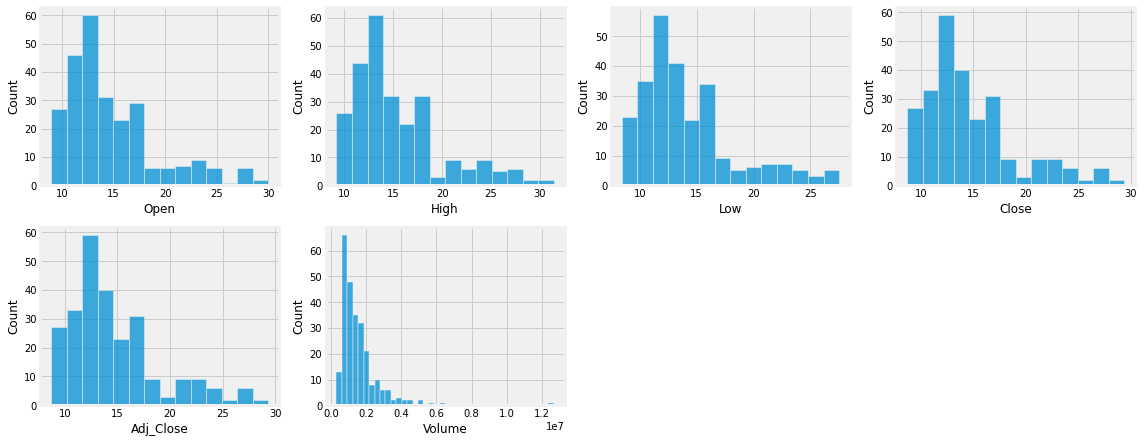

<IPython.core.display.Javascript object>

In [303]:
# Checking the histogram plot of numerical variables of the entire dataset
cols = 4
rows = 5
num_cols = data.select_dtypes(exclude="datetime64").columns
fig = plt.figure(figsize=(cols * 4, rows * 3))
for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i + 1)

    sns.histplot(x=data[col], ax=ax)

fig.tight_layout()
plt.show()

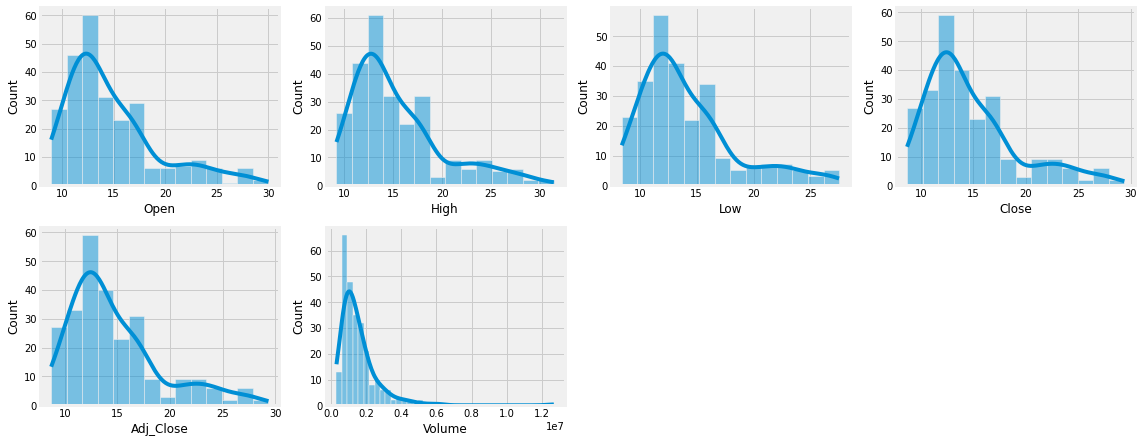

<IPython.core.display.Javascript object>

In [304]:
# Checking the histogram plot of numerical variables of the entire dataset
cols = 4
rows = 5
num_cols = data.select_dtypes(exclude="datetime64").columns
fig = plt.figure(figsize=(cols * 4, rows * 3))
for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i + 1)

    sns.histplot(x=data[col], kde=True, ax=ax)

fig.tight_layout()
plt.show()

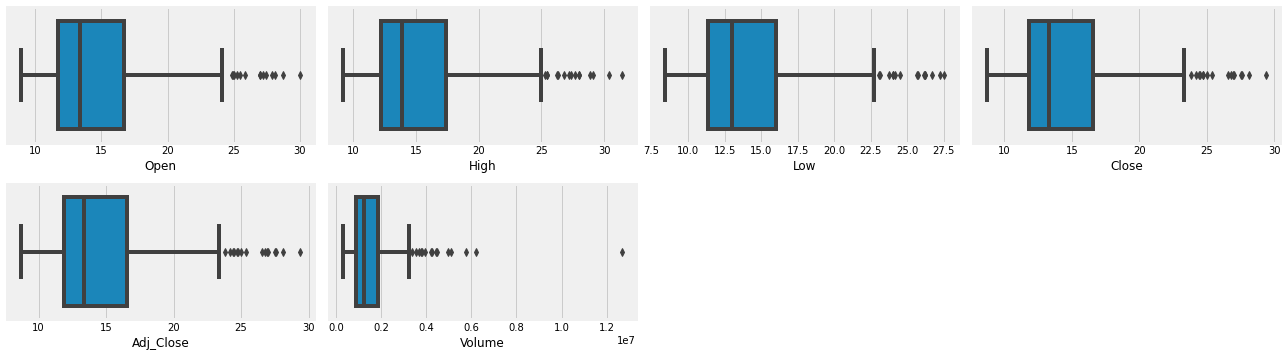

<IPython.core.display.Javascript object>

In [305]:
# Checking the boxplot of the numerical variable of the dataset
cols = 4
rows = 5
num_cols = data.select_dtypes(exclude="datetime64").columns
fig = plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i + 1)

    sns.boxplot(x=data[col], ax=ax)

fig.tight_layout()
plt.show()

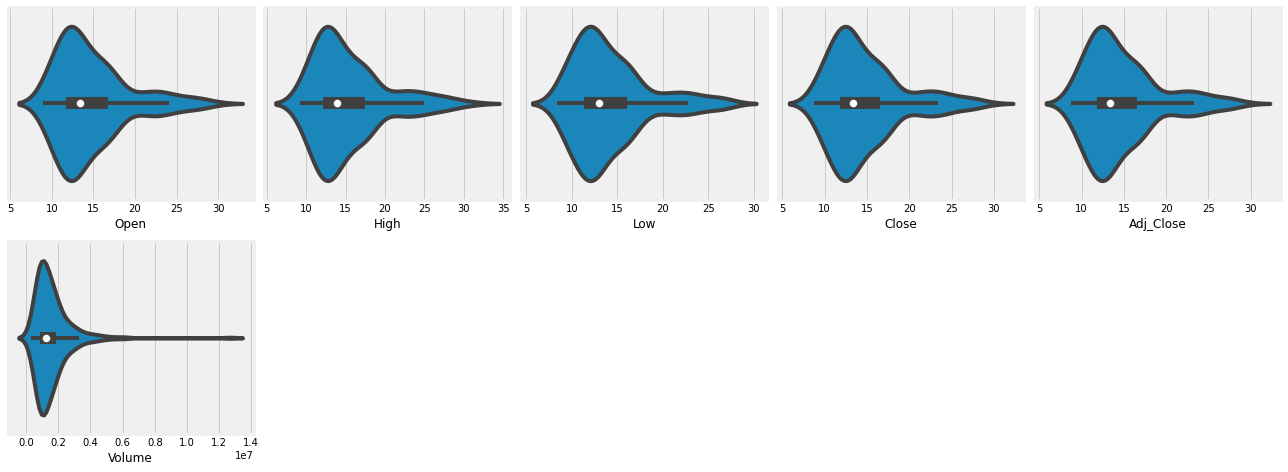

<IPython.core.display.Javascript object>

In [306]:
# Checking the voilin plot of the numerical variables
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude="datetime64").columns
fig = plt.figure(figsize=(18, 16))
for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i + 1)

    sns.violinplot(x=data[col], ax=ax)

fig.tight_layout()
plt.show()

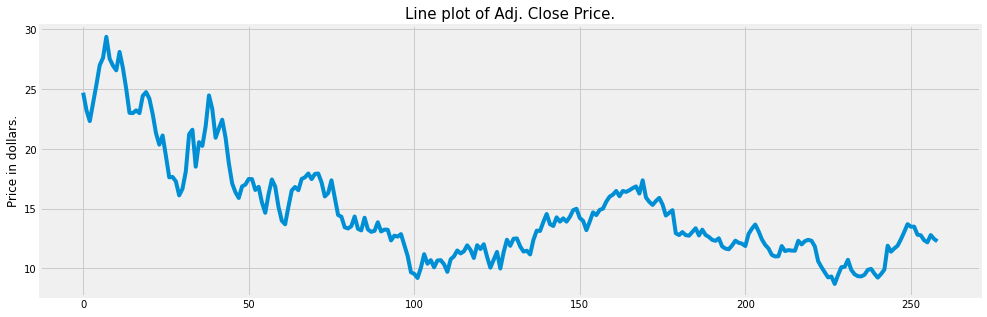

<IPython.core.display.Javascript object>

In [307]:
plt.figure(figsize=(15,5))
plt.plot(data['Adj_Close'])
plt.title('Line plot of Adj. Close Price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

## Runing the codes for histogram and boxplots

In [308]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

<IPython.core.display.Javascript object>

In [309]:
h_data=data.copy()
hist_data=h_data.drop('Date',axis=1)

<IPython.core.display.Javascript object>

In [310]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(hist_data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=hist_data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=hist_data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        hist_data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        hist_data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

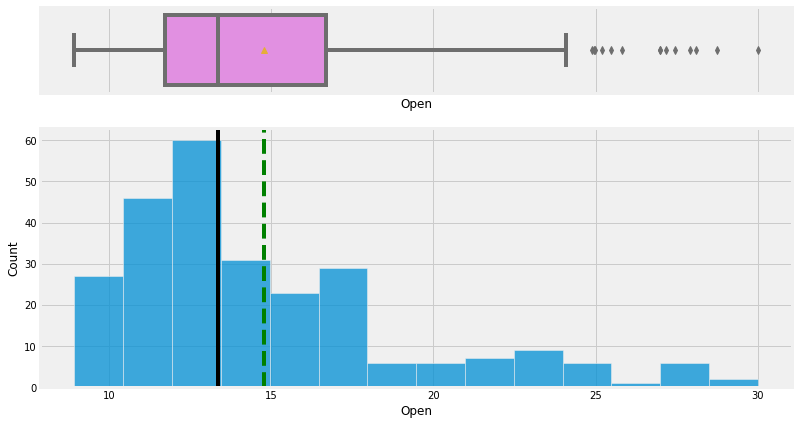

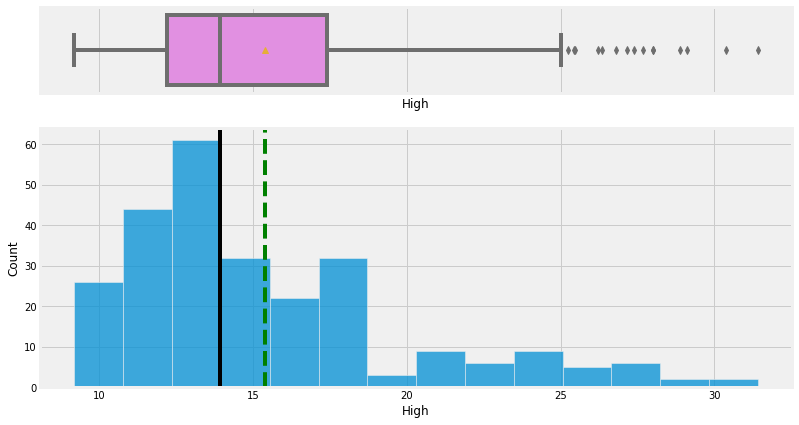

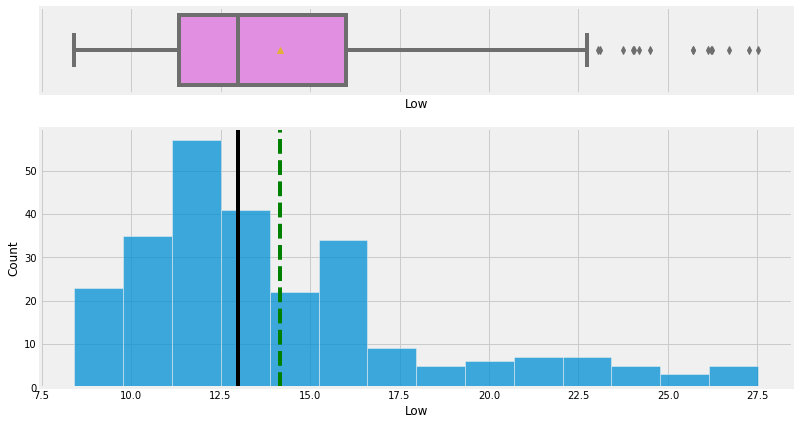

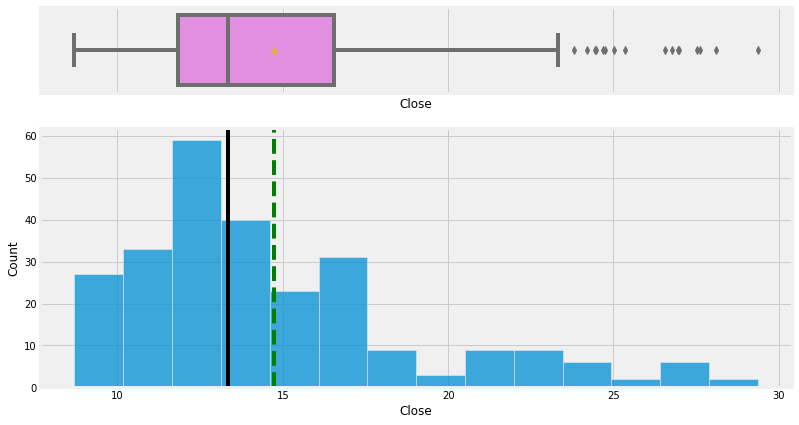

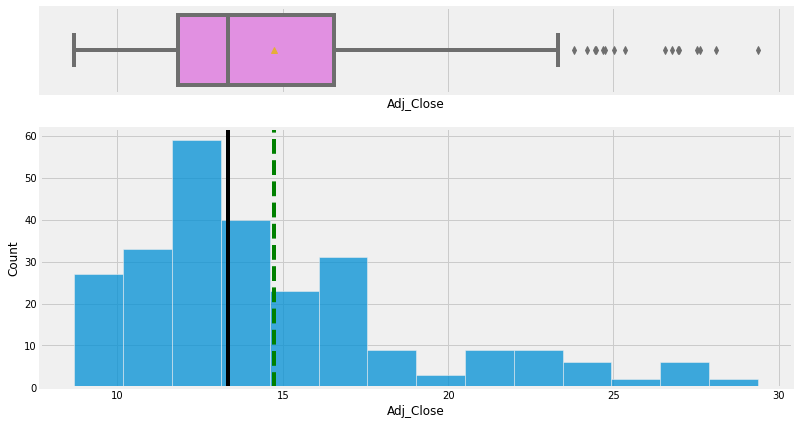

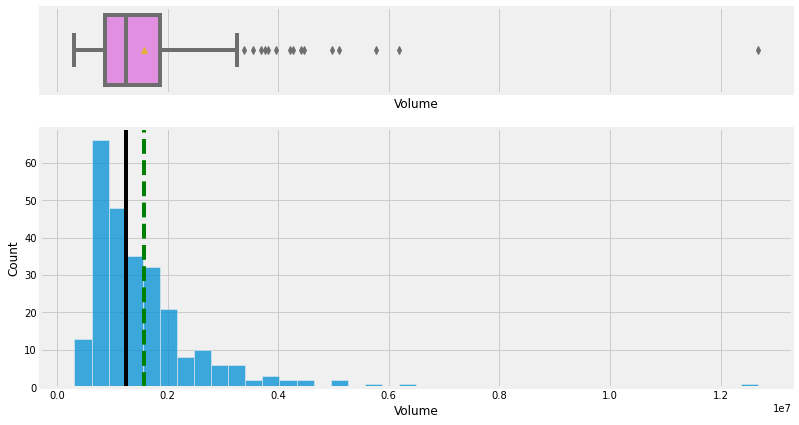

<IPython.core.display.Javascript object>

In [311]:
for feature in hist_data.columns:
    histogram_boxplot(
        hist_data, feature, figsize=(12, 7), kde=False, bins=None
    )  ## Please change the dataframe name as you define while reading the data

# Part II: Multivariate Data Analysis

## Correlation and Pairplot Analysis

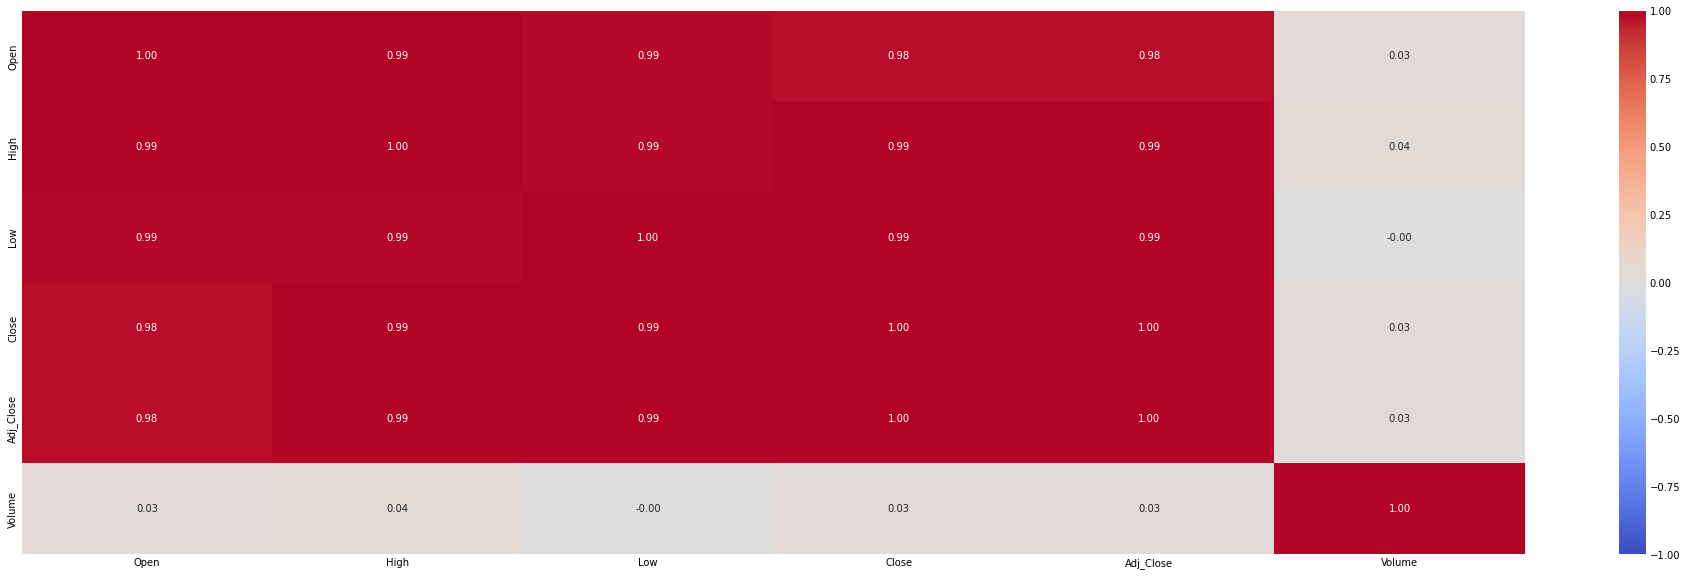

<IPython.core.display.Javascript object>

In [312]:
# Displaying the correlation between numerical variables of the dataset
plt.figure(figsize=(30, 10))
sns.heatmap(hist_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

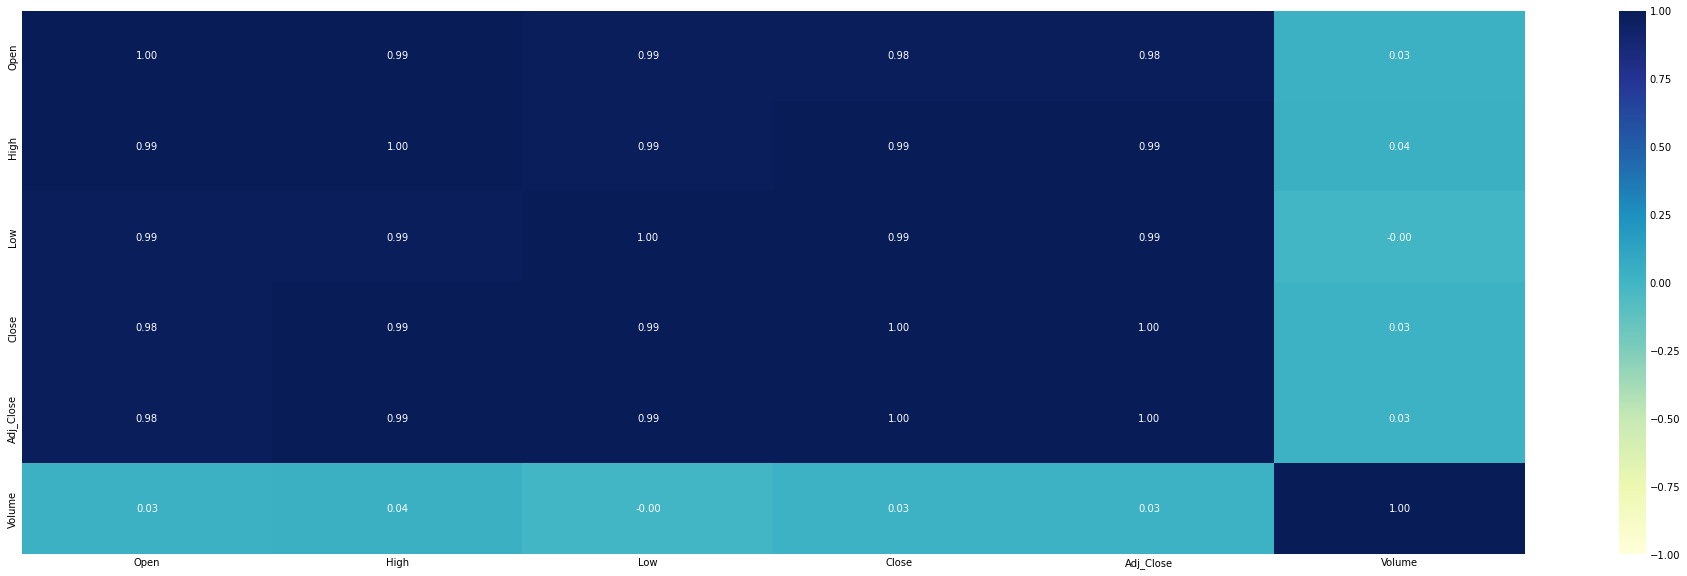

<IPython.core.display.Javascript object>

In [313]:
# creates heatmap showing correlation of numeric columns in data
plt.figure(figsize=(30, 10))
sns.heatmap(hist_data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True, fmt=".2f")

# Part III: Data Preparation for Model Building

##Feature Engineering

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [314]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       259 non-null    datetime64[ns]
 1   Open       259 non-null    float64       
 2   High       259 non-null    float64       
 3   Low        259 non-null    float64       
 4   Close      259 non-null    float64       
 5   Adj_Close  259 non-null    float64       
 6   Volume     259 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.3 KB


<IPython.core.display.Javascript object>

A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

In [315]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter_End'] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Day,Month,Year,Quarter_End
0,2021-12-15,24.90,25.25,23.75,24.70,24.70,12675200,15,12,2021,1
1,2021-12-16,24.94,25.00,23.11,23.23,23.23,2939200,16,12,2021,1
2,2021-12-17,23.00,23.09,21.80,22.32,22.32,2994600,17,12,2021,1
3,2021-12-20,22.58,24.05,22.50,23.82,23.82,1465200,20,12,2021,1
4,2021-12-21,24.08,26.20,24.05,25.36,25.36,3550600,21,12,2021,1


<IPython.core.display.Javascript object>

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         259 non-null    datetime64[ns]
 1   Open         259 non-null    float64       
 2   High         259 non-null    float64       
 3   Low          259 non-null    float64       
 4   Close        259 non-null    float64       
 5   Adj_Close    259 non-null    float64       
 6   Volume       259 non-null    int64         
 7   Day          259 non-null    int64         
 8   Month        259 non-null    int64         
 9   Year         259 non-null    int64         
 10  Quarter_End  259 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 22.4 KB


<IPython.core.display.Javascript object>

In [317]:
df.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume,Day,Month,Year,Quarter_End
254,2022-12-19,12.70,12.71,12.28,12.36,12.36,1220100,19,12,2022,1
255,2022-12-20,12.16,12.46,12.00,12.18,12.18,987300,20,12,2022,1
256,2022-12-21,12.18,12.80,12.00,12.79,12.79,1023600,21,12,2022,1
257,2022-12-22,12.50,12.60,12.17,12.47,12.47,778000,22,12,2022,1
258,2022-12-23,12.31,12.44,12.02,12.27,12.27,660800,23,12,2022,1


<IPython.core.display.Javascript object>

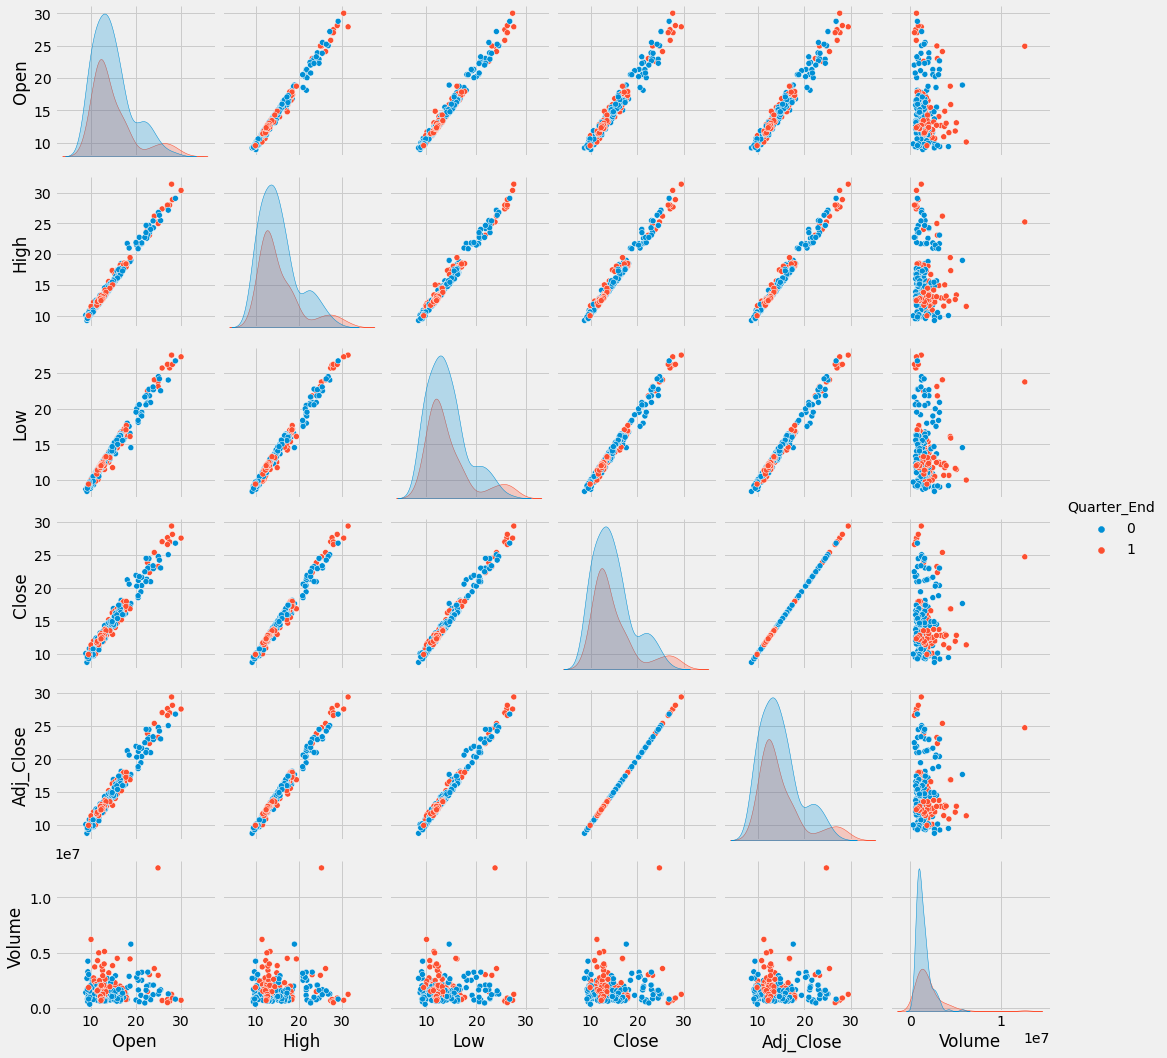

<IPython.core.display.Javascript object>

In [318]:
plt.style.use("fivethirtyeight")
sns.pairplot(df, hue="Quarter_End", vars=hist_data.columns, diag_kind="kde");

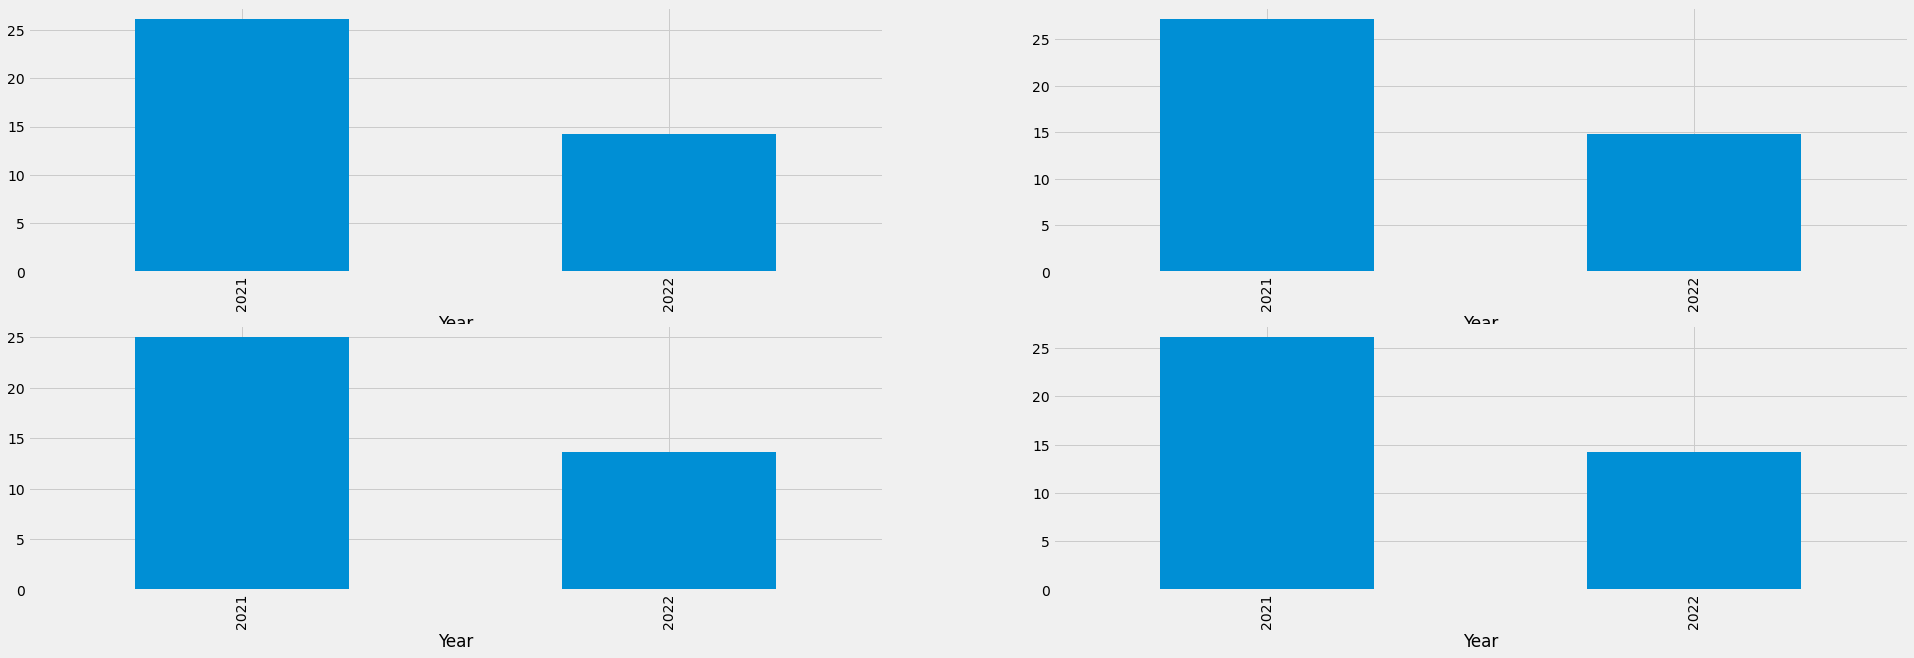

<IPython.core.display.Javascript object>

In [319]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(30,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Adj_Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

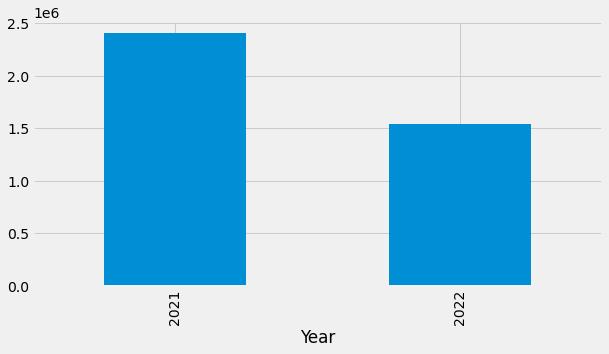

<IPython.core.display.Javascript object>

In [320]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Volume']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [321]:
df.groupby('Quarter_End').mean()

,Open,High,Low,Close,Adj_Close,Volume,Day,Month,Year
Quarter_End,,,,,,,,,
0,14.69,15.26,14.04,14.62,14.62,1365492.73,15.51,6.11,2022.00
1,14.96,15.61,14.35,14.96,14.96,1953300.00,16.31,7.79,2021.87


<IPython.core.display.Javascript object>

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [322]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

<IPython.core.display.Javascript object>

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

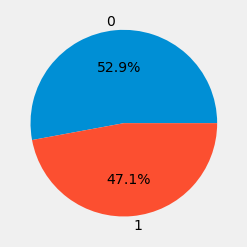

<IPython.core.display.Javascript object>

In [323]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         259 non-null    datetime64[ns]
 1   Open         259 non-null    float64       
 2   High         259 non-null    float64       
 3   Low          259 non-null    float64       
 4   Close        259 non-null    float64       
 5   Adj_Close    259 non-null    float64       
 6   Volume       259 non-null    int64         
 7   Day          259 non-null    int64         
 8   Month        259 non-null    int64         
 9   Year         259 non-null    int64         
 10  Quarter_End  259 non-null    int64         
 11  open-close   259 non-null    float64       
 12  low-high     259 non-null    float64       
 13  target       259 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 28.5 KB


<IPython.core.display.Javascript object>

hen we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

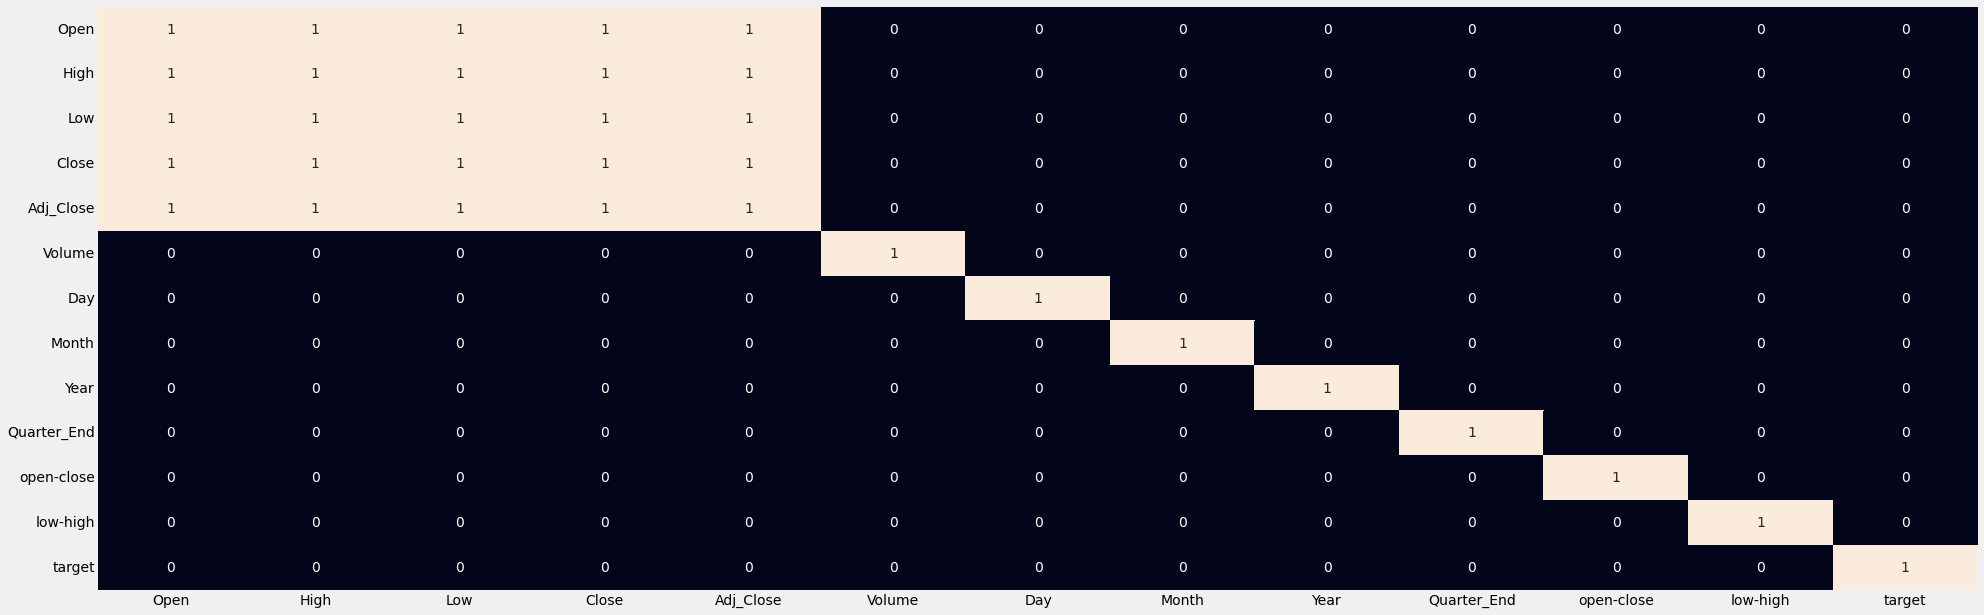

<IPython.core.display.Javascript object>

In [325]:
plt.figure(figsize=(30, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

## Data Splitting and Normalization

In [326]:
features = df[['open-close', 'low-high', 'Quarter_End']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.3, random_state=2023)
print(X_train.shape, X_valid.shape)

(181, 3) (78, 3)


<IPython.core.display.Javascript object>

In [327]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(181, 3) (78, 3)


<IPython.core.display.Javascript object>

In [328]:
print("*" * 60)
print("Shape of Training set : ", X_train.shape)

print("*" * 60)
print("Shape of test set : ", X_test.shape)

print("*" * 60)
print("Percentage of classes in training set:")
print("*" * 60)
print(Y_train.value_counts(normalize=True))
print("*" * 60)
print("Percentage of classes in test set:")

print(Y_test.value_counts(normalize=True))
print("*" * 60)

************************************************************
Shape of Training set :  (181, 3)
************************************************************
Shape of test set :  (78, 3)
************************************************************
Percentage of classes in training set:
************************************************************
0   0.51
1   0.49
Name: target, dtype: float64
************************************************************
Percentage of classes in test set:
0   0.56
1   0.44
Name: target, dtype: float64
************************************************************


<IPython.core.display.Javascript object>

In [329]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.6099706744868035
Validation Accuracy :  0.5441176470588235

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.6610459433040078
Validation Accuracy :  0.5982620320855615

XGBClassifier() : 
Training Accuracy :  0.947886119257087
Validation Accuracy :  0.7987967914438502



<IPython.core.display.Javascript object>

# Part II:Building Models for Decision Trees, Bagging Boosting

image.png

## Importing all the Relevant Libraries for Data Analysis

In [330]:
# installing the needed upgrade optimum performance
!pip install nb_black
!pip install ipython --upgrade
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

In [331]:
# Other important packages for data data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm
from scipy import stats;

<IPython.core.display.Javascript object>

In [332]:
#format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

<IPython.core.display.Javascript object>

In [333]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns



# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200);


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [334]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import xgboost as xgb

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [335]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# To build Logistic Regression model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [336]:
# Import all the Required Statistical Distributions
from scipy import stats
from scipy.stats import ttest_1samp
from numpy import sqrt, abs
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2
from scipy.stats import f
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene;

<IPython.core.display.Javascript object>

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

<IPython.core.display.Javascript object>

image.png

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [338]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

image.png

In [339]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    Y_pred = model.predict(predictors)
    cm = confusion_matrix(target, Y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(15, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [340]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (15,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>

In [341]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,Y_train))
        print("Accuracy on test set : ",model.score(X_test,Y_test))
        print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(Y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(Y_test,pred_test))
    
    return score_list # returning the list with train and test scores

<IPython.core.display.Javascript object>

image.png

## Building the model
- We are going to build 2 ensemble models here - Bagging Classifier and Random Forest Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

## Decision Tree Model

- ***The decision tree model would be considered overfit if the metric of interest is 'accuracy' since the difference between the training data accuracy and testing data accuracy is very large which indicates the fact that the model is not able to generalize to new data points and is overfitting the training dataset.***

- ***When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. This is done using the stratify parameter in the train_test_split function.***

In [144]:
model = DecisionTreeClassifier(criterion="gini", random_state=1) ## Complete the code to define decision tree classifier with random state = 1
model.fit(X_train, Y_train)  ## Complete the code to fit decision tree classifier on the train data 

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

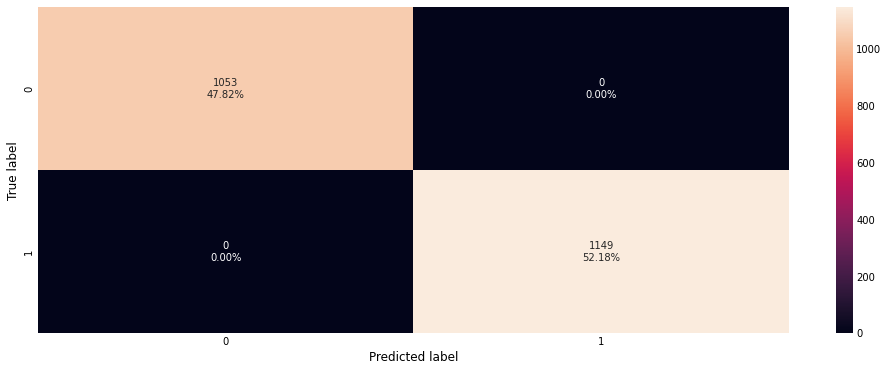

<IPython.core.display.Javascript object>

In [150]:
#confusion_matrix_sklearn(model, X_train, Y_train) ## Complete the code to create confusion matrix for train data
confusion_matrix_sklearn(model, X_train, Y_train)

In [151]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, Y_train) ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


<IPython.core.display.Javascript object>

**Observation**

The decision tree model is highly overfitting the train dataset.

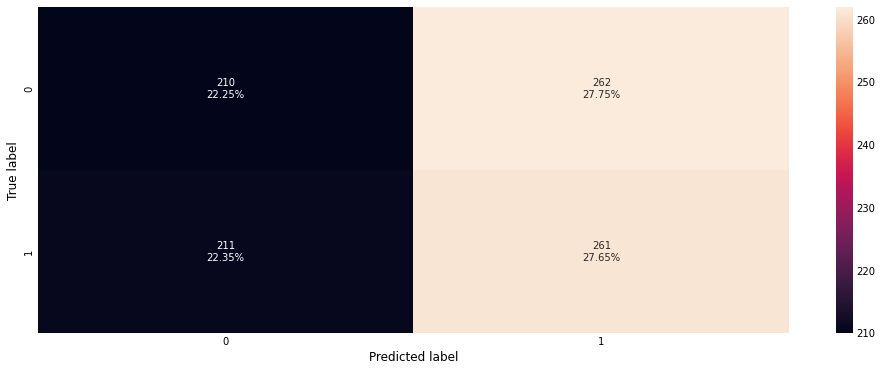

<IPython.core.display.Javascript object>

In [152]:
confusion_matrix_sklearn(model, X_test, Y_test) ## Complete the code to create confusion matrix for test data

In [153]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, Y_test) ## Complete the code to check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.50,0.55,0.50,0.52


<IPython.core.display.Javascript object>

- The decision tree is overfitting the training data.

image.png

## Method2: Weighted Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [154]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

<IPython.core.display.Javascript object>

In [155]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

<IPython.core.display.Javascript object>

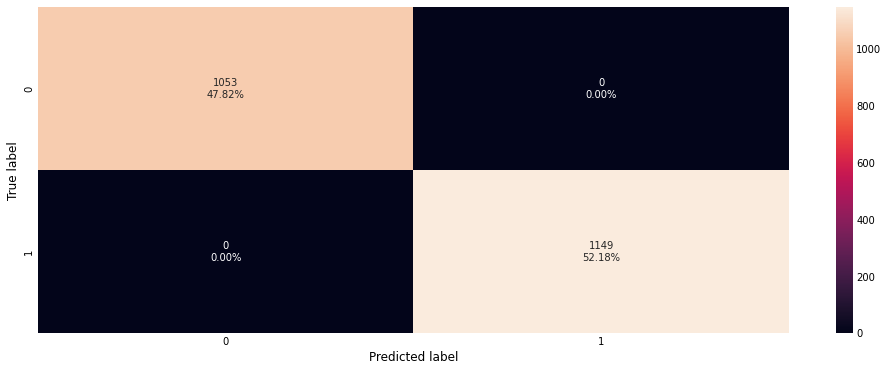

<IPython.core.display.Javascript object>

In [156]:
confusion_matrix_sklearn(dtree, X_train, Y_train)

In [157]:
# Training Performance Mearsures
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, Y_train)
print("Training performance \n")
dtree_model_train_perf

Training performance 



,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


<IPython.core.display.Javascript object>

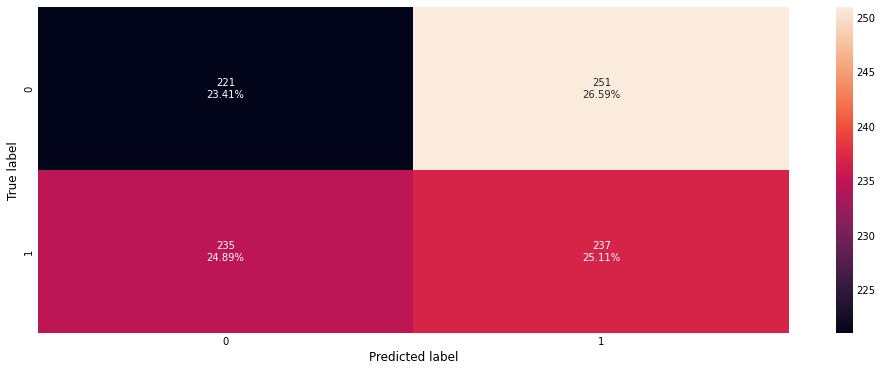

<IPython.core.display.Javascript object>

In [158]:
confusion_matrix_sklearn(dtree, X_test, Y_test)

In [159]:
# Test Performance Measures
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, Y_test)
print("Testing performance \n")
dtree_model_test_perf

Testing performance 



,Accuracy,Recall,Precision,F1
0,0.49,0.50,0.49,0.49


<IPython.core.display.Javascript object>

* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

image.png

### Hyperparameter Tuning - Decision Tree

In [160]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj =  GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, Y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=3,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

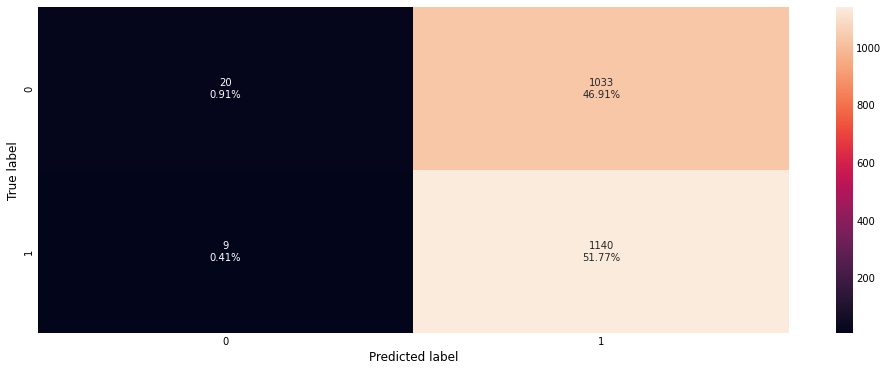

<IPython.core.display.Javascript object>

In [161]:
confusion_matrix_sklearn(dtree_estimator, X_train, Y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [162]:
# Tunned Training Performance Measures
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, Y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.53,0.99,0.52,0.69


<IPython.core.display.Javascript object>

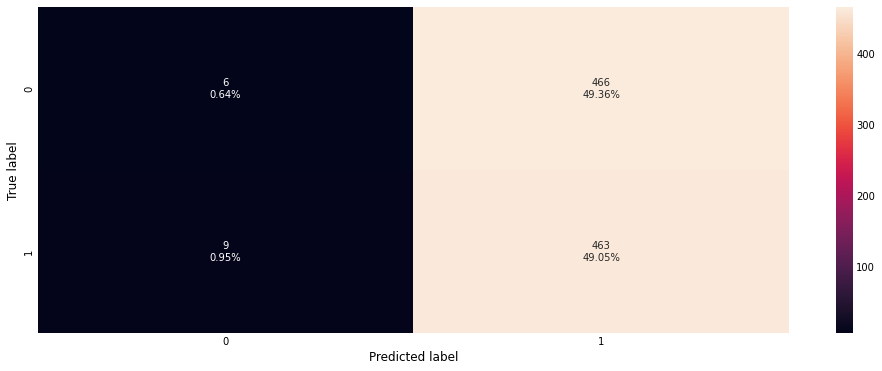

<IPython.core.display.Javascript object>

In [163]:
confusion_matrix_sklearn(dtree_estimator, X_test, Y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [164]:
# Tunned Test Performance Measures
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, Y_test) ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.50,0.98,0.50,0.66


<IPython.core.display.Javascript object>

image.png

## Hyperparameter Tuning Weighted Decision Tree

In [165]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.001,
                       min_samples_leaf=5, random_state=1)

<IPython.core.display.Javascript object>

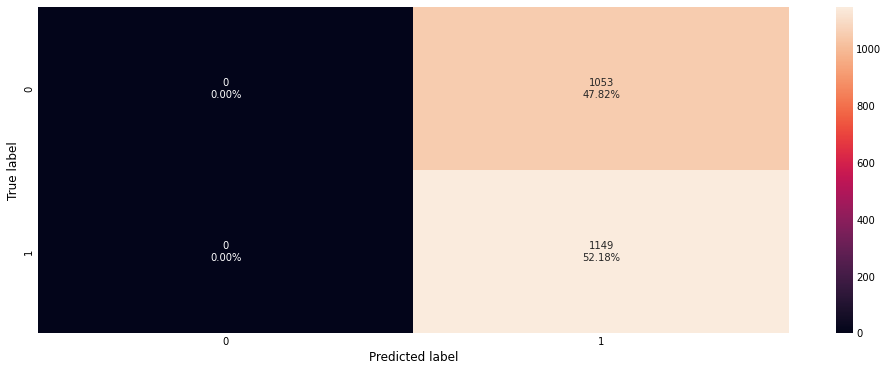

<IPython.core.display.Javascript object>

In [166]:
confusion_matrix_sklearn(dtree_estimator, X_train,Y_train)

In [167]:
# Training Performance Measures 
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,Y_train)

print("Training performance \n")
dtree_estimator_model_train_perf

Training performance 



,Accuracy,Recall,Precision,F1
0,0.52,1.00,0.52,0.69


<IPython.core.display.Javascript object>

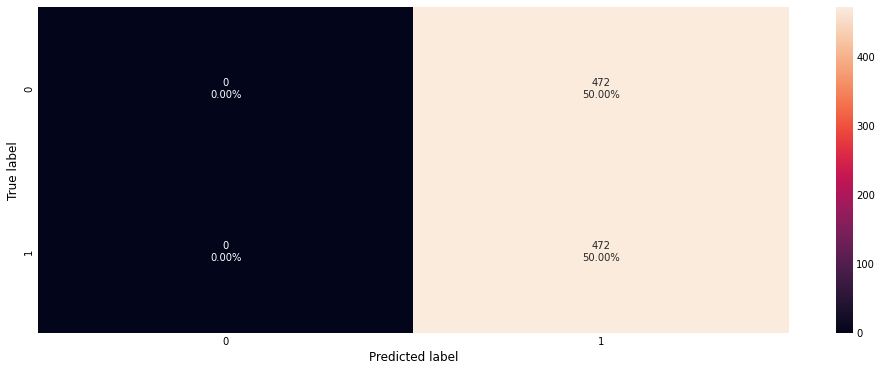

<IPython.core.display.Javascript object>

In [168]:
confusion_matrix_sklearn(dtree_estimator, X_test,Y_test)

In [171]:
# Testing Performance Measures
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, Y_test)
print("Testing performance \n")
dtree_estimator_model_test_perf

Testing performance 



,Accuracy,Recall,Precision,F1
0,0.50,1.00,0.50,0.67


<IPython.core.display.Javascript object>

* Overfitting in decision tree has reduced but the recall has also reduced.

* The decision tree model has a high recall but, the precision is quite lower.

* The performance of the model after hyperparameter tuning can be generalized.

* The coefficients of  F1 score of  for both train and test dataset are 0.812 and 0.809 respectively.


* The decision tree is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is very low i.e. only 58%.


## Bagging Classifier

- ***Bagging refers to bootstrap sampling and aggregation. This means that in bagging at the beginning samples are chosen randomly with replacement to train the individual models and then model predictions undergo aggregation to combine them for the final prediction to consider all the possible outcomes.***


- ***Bagging makes the model more robust since the final prediction is made on the basis of a number of outputs that have been given by a large number of independent models. It prevents overfitting the model to the original data since the individual models do not have access to the original data and are only built on samples that have been randomly chosen from the original data with replacement. Bagging follows the parallel model building i.e the output of individual models is independent of each other.***

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [175]:
bagging_classifier = BaggingClassifier(random_state=1) ## Complete the code to define bagging classifier with random state = 1
bagging_classifier.fit(X_train, Y_train) ## Complete the code to fit bagging classifier on the train data

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

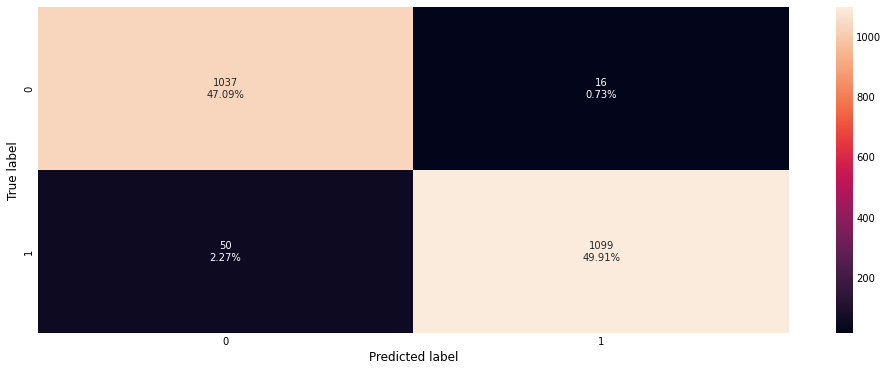

<IPython.core.display.Javascript object>

In [176]:
confusion_matrix_sklearn(bagging_classifier,X_train, Y_train) ## Complete the code to create confusion matrix for train data

In [177]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train, Y_train) ## Complete the code to check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.97,0.96,0.99,0.97


<IPython.core.display.Javascript object>

#### Checking model performance on test set

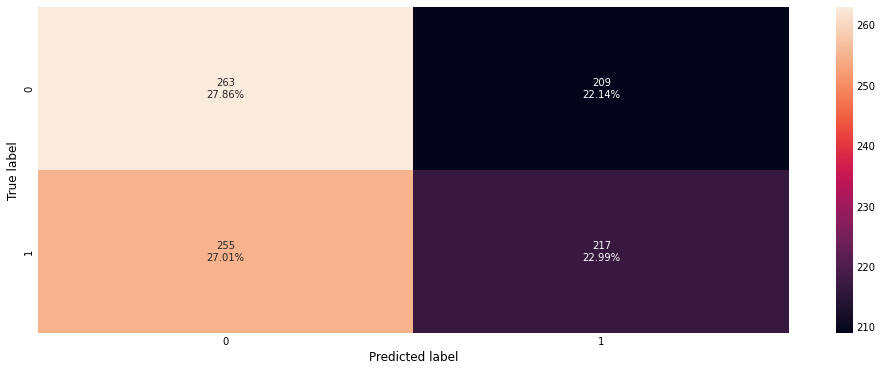

<IPython.core.display.Javascript object>

In [178]:
confusion_matrix_sklearn(bagging_classifier,X_test, Y_test) ## Complete the code to create confusion matrix for test data

In [179]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test ,Y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf


,Accuracy,Recall,Precision,F1
0,0.51,0.46,0.51,0.48


<IPython.core.display.Javascript object>

- The overfitting has decrease slightly in the training data

- The test model performance is lower than in hyperparamenter tuned Decision tree

image.png

## Method2:  Bagging Classifier - Weighted Decision Tree

**Bagging Classifier with weighted decision tree**

In [180]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

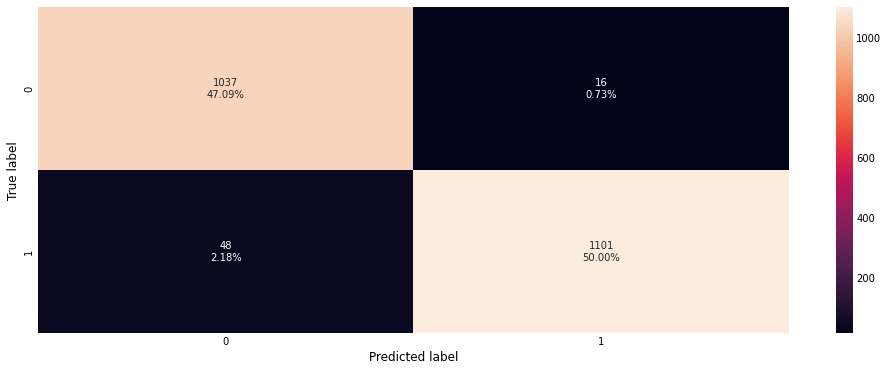

<IPython.core.display.Javascript object>

In [181]:
confusion_matrix_sklearn(bagging_wt,X_train,Y_train)

In [182]:
# Training Performance Measures
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,Y_train)
print("Training performance \n")
bagging_wt_model_train_perf

Training performance 



,Accuracy,Recall,Precision,F1
0,0.97,0.96,0.99,0.97


<IPython.core.display.Javascript object>

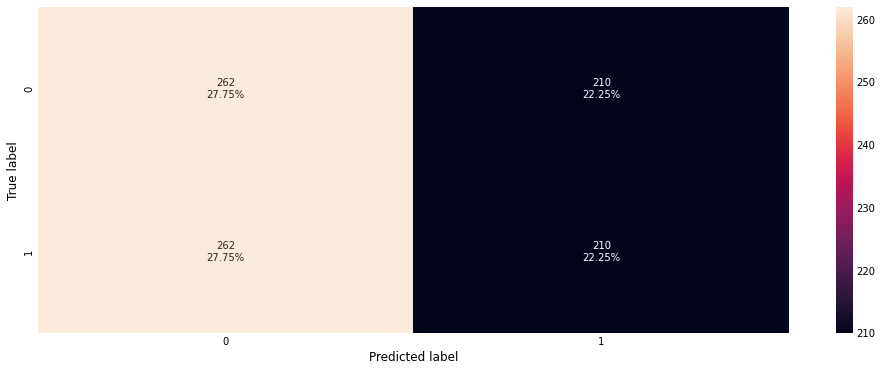

<IPython.core.display.Javascript object>

In [183]:
confusion_matrix_sklearn(bagging_wt,X_test,Y_test)

In [184]:
# Testing Performance Measures
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, Y_test)
print("Testing performance \n")
bagging_wt_model_test_perf

Testing performance 



,Accuracy,Recall,Precision,F1
0,0.50,0.44,0.50,0.47


<IPython.core.display.Javascript object>

* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of recall.

## Hyperparameter Tuning - Bagging Classifier

#### Bagging Classifier

***Some of the important hyperparameters available for bagging classifier are***:

-  `base_estimator:` The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.

- `n_estimators:` The number of trees in the forest, default = 100.
max_features: The number of features to consider when looking for the best split.

- `bootstrap:` Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.


- `bootstrap_features:` If it is true, then features are drawn with replacement. Default value is False.


-  `max_samples:` If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.

- `oob_score:` Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.


In [185]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, Y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, Y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=110,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

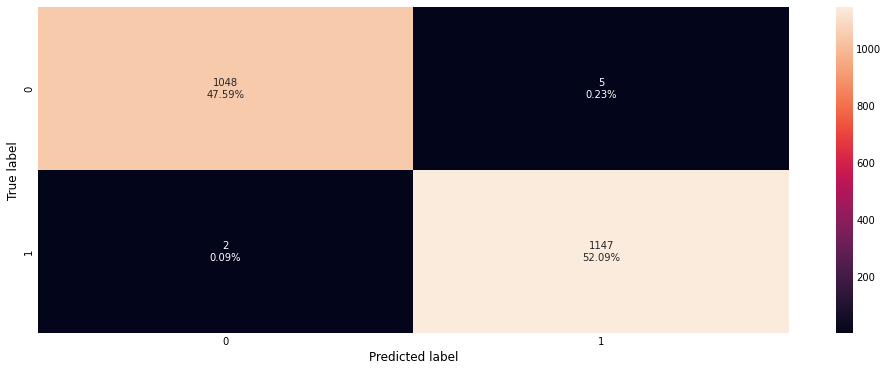

<IPython.core.display.Javascript object>

In [186]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_train, Y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [187]:
# Training Performance Mearsures
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train, Y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


<IPython.core.display.Javascript object>

#### Checking model performance on test set

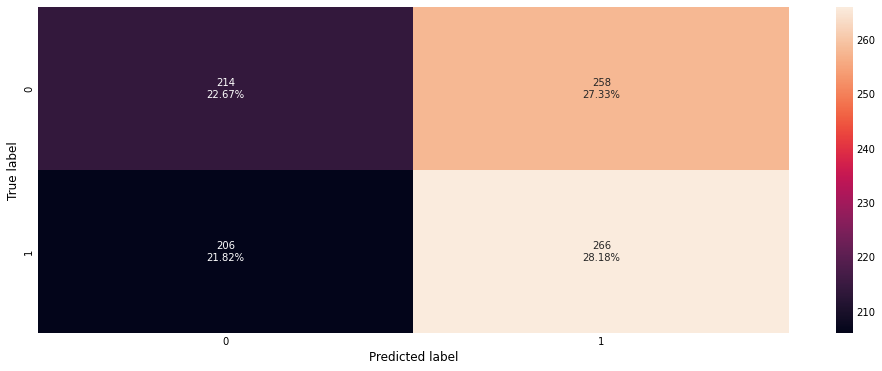

<IPython.core.display.Javascript object>

In [188]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_test, Y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [189]:
# Testing Performce Measures
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test, Y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.51,0.56,0.51,0.53


<IPython.core.display.Javascript object>

The model performance has increased but the training data is still overfitting

## Method 2: Logistic Regression as the base estimator for Bagging Classifier

### Let's try using logistic regression as the base estimator for bagging classifier:
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [190]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,Y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

<IPython.core.display.Javascript object>

In [191]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.5231607629427792
Accuracy on test set :  0.4915254237288136
Recall on training set :  0.9625761531766753
Recall on test set :  0.9597457627118644
Precision on training set :  0.5234264079507809
Precision on test set :  0.49562363238512036


<IPython.core.display.Javascript object>

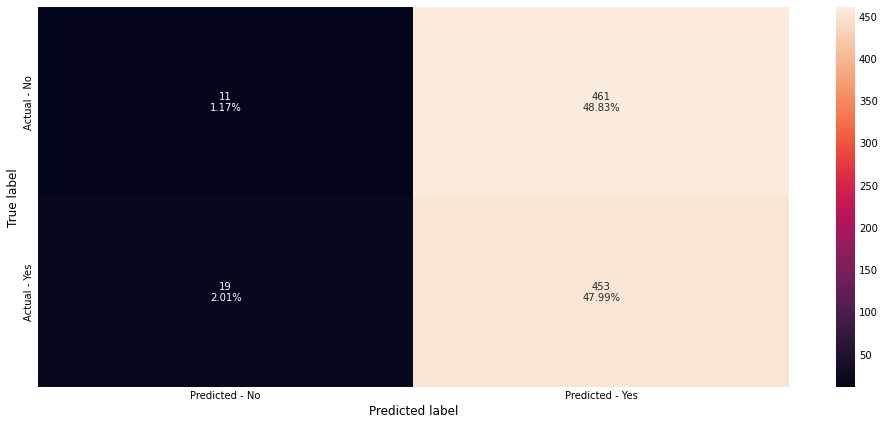

<IPython.core.display.Javascript object>

In [192]:
make_confusion_matrix(bagging_lr,Y_test)

### Insights
- Bagging classifier with logistic regression as base_estimator is not overfitting the data but the test recall is very low.
- Ensemble models are less interpretable than decision tree but bagging classifier is even less interpretable than random forest. It does not even have a feature importance attribute.

## Tuning Bagging Classifier- Weighte Model

In [193]:
# grid search for bagging classifier
bagging_estimator_weighted = DecisionTreeClassifier(class_weight={0:0.13,1:0.87},random_state=1)
param_grid = {'base_estimator':[bagging_estimator_weighted],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, Y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.13,
                                                                      1: 0.87},
                                                        random_state=1),
                  max_features=1, n_estimators=101, random_state=1)

<IPython.core.display.Javascript object>

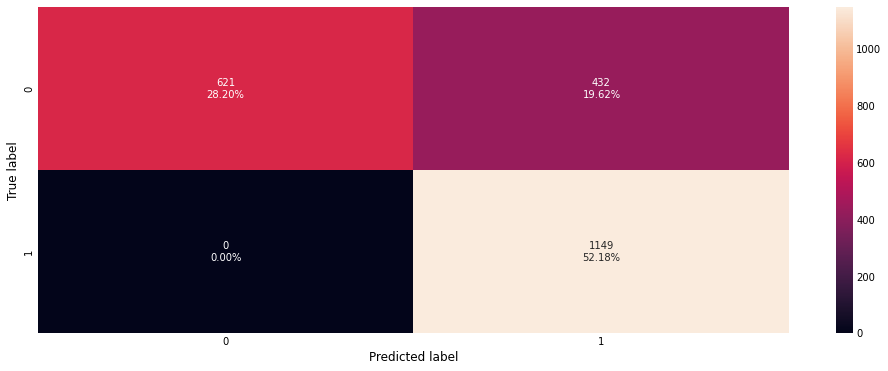

<IPython.core.display.Javascript object>

In [194]:
confusion_matrix_sklearn(bagging_estimator, X_train,Y_train)

In [195]:
# Training Performance Measures
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,Y_train)
print("Training performance: \n ")
bagging_estimator_model_train_perf

Training performance: 
 


,Accuracy,Recall,Precision,F1
0,0.80,1.00,0.73,0.84


<IPython.core.display.Javascript object>

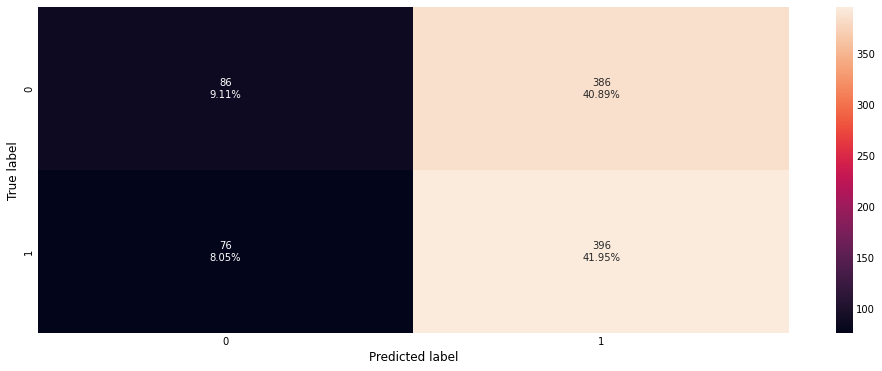

<IPython.core.display.Javascript object>

In [196]:
confusion_matrix_sklearn(bagging_estimator, X_test,Y_test)

In [197]:
# Testing Performance Mearsures
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, Y_test)
print("Testing performance \n")
bagging_estimator_model_test_perf

Testing performance 



,Accuracy,Recall,Precision,F1
0,0.51,0.84,0.51,0.63


<IPython.core.display.Javascript object>

* Recall has improved but the accuracy and precision of the model has dropped drastically which is an indication that overall the model is making many mistakes.

image.png

## Random Forest

- ***Random forest randomly picks a subset of independent variables for each node's split, where m is the size of the subset and M is the total number of independent variables, where m is generally less than M. This is done to make the individual trees even more independent/different from each other and incorporate more diversity in our final prediction thereby, making the entire model more robust.***

- ***In Random Forest, to get different n-models with the same algorithm, we use Bootstrap aggregation. This means that at the beginning samples are chosen randomly with replacement to train the individual models and then model predictions undergo aggregation to combine them for the final prediction to consider all the possible outcomes.***

- ***The problem of overfitting in a decision tree can be overcome by random forest since the individual trees in a random forest do not have access to the original dataset and are only built on observations that have been sampled with replacement from the original dataset.***


- ***Since the random forest uses multiple tree models to reach a final prediction, it is more robust than a single decision tree model and prevents instabilities due to changes in data. Random forest is less interpretable and has higher computational complexity than decision trees as it utilizes multiple tree models to reach a prediction.***

- ***Random forest prevents overfitting since the individual trees in a random forest do not have access to the original dataset and are only built on observations that have been sampled with replacement from the original dataset. Moreover, aggregation of results from different trees in a random forest reduces the chances of overfitting and so there is no need to prune a random forest.***

- ***In a classification setting, for a new test data point, the final prediction by a random forest is done by taking the mode of the individual predictions while in a regression setting, for a new test data point, the final prediction by a random forest is done by taking the average of individual predictions.***

## Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.


In [198]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1) ## Complete the code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train, Y_train) ## Complete the code to fit random forest on the train data

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

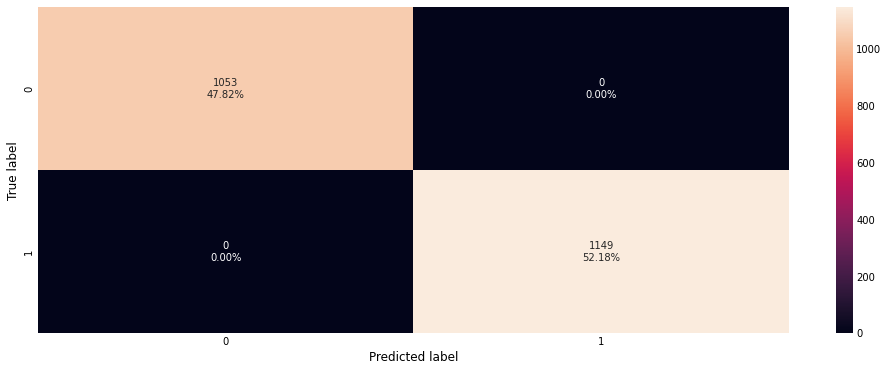

<IPython.core.display.Javascript object>

In [199]:
confusion_matrix_sklearn(rf_estimator,X_train, Y_train) ## Complete the code to create confusion matrix for train data

In [200]:
# Training Performance Measures
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, Y_train) ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


<IPython.core.display.Javascript object>

#### Checking model performance on test set

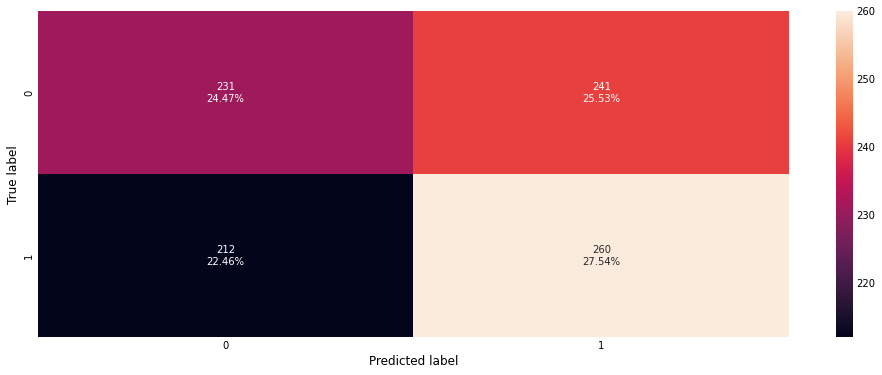

<IPython.core.display.Javascript object>

In [201]:
confusion_matrix_sklearn(rf_estimator, X_test, Y_test) ## Complete the code to create confusion matrix for test data

In [202]:
# Testing Prformance Measures
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, Y_test) ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.52,0.55,0.52,0.53


<IPython.core.display.Javascript object>

## Random Forest -Weighted Class

**Random forest with class weights**

In [203]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,Y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

<IPython.core.display.Javascript object>

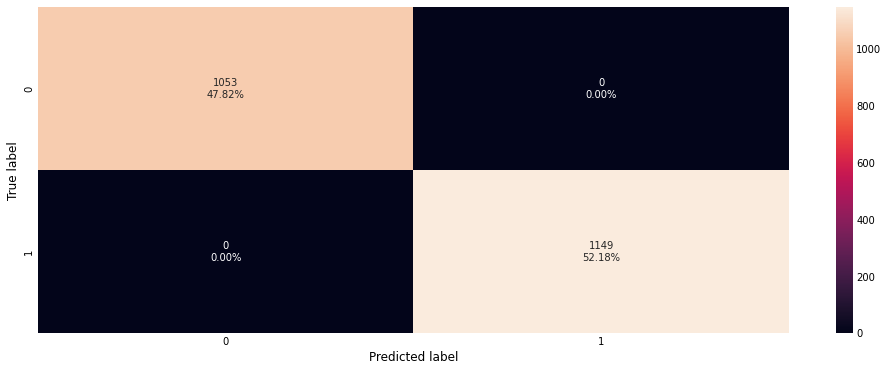

<IPython.core.display.Javascript object>

In [204]:
confusion_matrix_sklearn(rf_wt, X_train,Y_train)

In [205]:
# Training Performance Measures
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,Y_train)
print("Training performance \n")
rf_wt_model_train_perf

Training performance 



,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


<IPython.core.display.Javascript object>

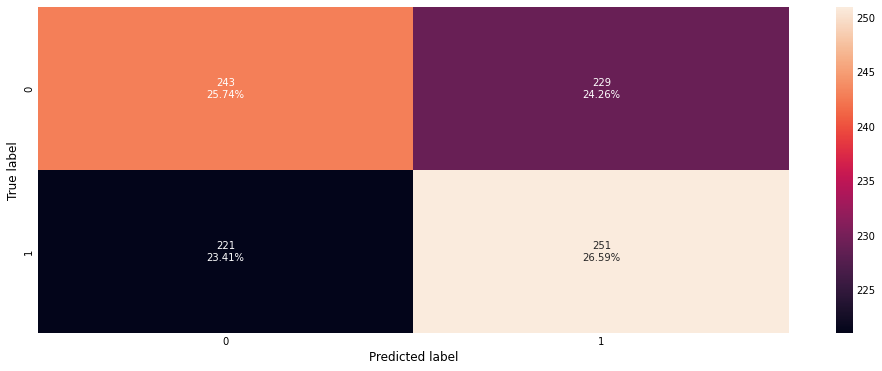

<IPython.core.display.Javascript object>

In [206]:
confusion_matrix_sklearn(rf_wt, X_test,Y_test)

In [207]:
# Testing Performance Measures
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,Y_test)
print("Testing performance \n")
    
rf_wt_model_test_perf

Testing performance 



,Accuracy,Recall,Precision,F1
0,0.52,0.53,0.52,0.53


<IPython.core.display.Javascript object>

* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

* Random forest is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
* The test recall is even lower than the decision tree but has a higher test precision.

## Hyperparameter Tuning - Random Forest

- ***The class_weight is the hyperparameter of Random Forest which is useful in dealing with imbalanced data by giving more importance to the minority class. By giving more class_weight to a certain class than the other class, we tell the model that it is more important to correctly predict a certain class than the other class.***

### Let's try using class_weights for random forest:
- The model performance is not very good. This may be due to the fact that the classes are imbalanced with 70% non-defaulters and 30% defaulters. 

- We should make the model aware that the class of interest here is 'defaulters'.

- We can do so by passing the parameter `class_weights` available for random forest. This parameter is not available for the bagging classifier.

- class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- We can choose class_weights={0:0.3,1:0.7} because that is the original imbalance in our data.

In [208]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj =GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, Y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=7,
                       n_estimators=30, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

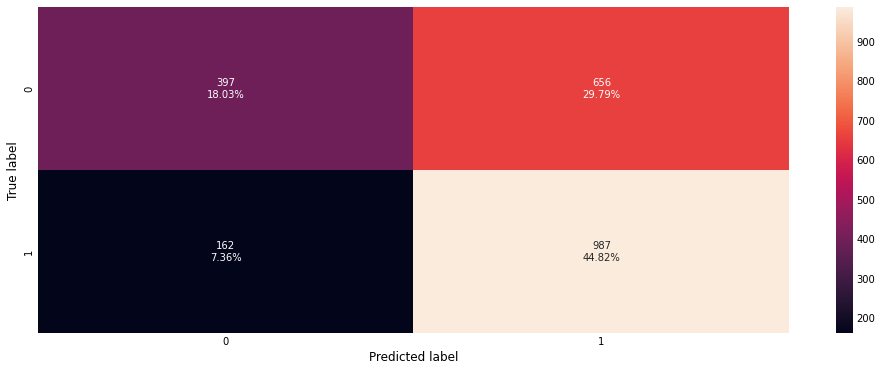

<IPython.core.display.Javascript object>

In [209]:
confusion_matrix_sklearn(rf_tuned, X_train, Y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [210]:
# Training Performance Measures
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, Y_train) ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.63,0.86,0.60,0.71


<IPython.core.display.Javascript object>

#### Checking model performance on test set

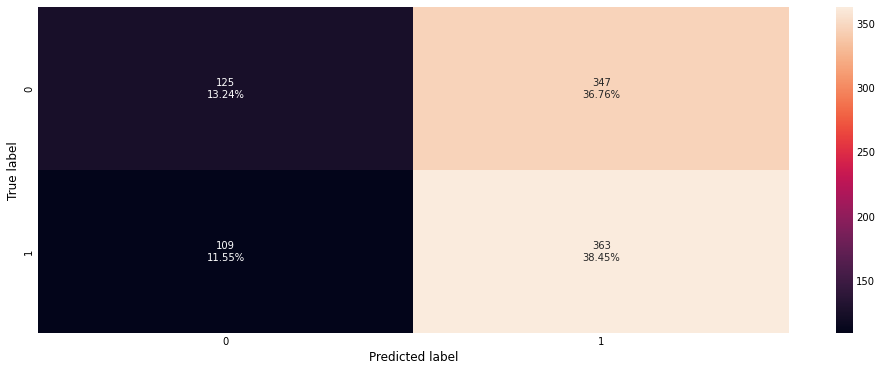

<IPython.core.display.Javascript object>

In [211]:
confusion_matrix_sklearn(rf_tuned, X_test, Y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [212]:
# Test Performance Measures
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, Y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.52,0.77,0.51,0.61


<IPython.core.display.Javascript object>

## Method 2

## Class_Weights for Random Forest - Hyperparameter Tuning

### Let's try using class_weights for random forest:
- The model performance is not very good. This may be due to the fact that the classes are imbalanced with 70% non-defaulters and 30% defaulters. 

- We should make the model aware that the class of interest here is 'defaulters'.

- We can do so by passing the parameter `class_weights` available for random forest. This parameter is not available for the bagging classifier.

- class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- We can choose class_weights={0:0.3,1:0.7} because that is the original imbalance in our data.

In [213]:
 # Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.2,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=200,
                       random_state=1)

<IPython.core.display.Javascript object>

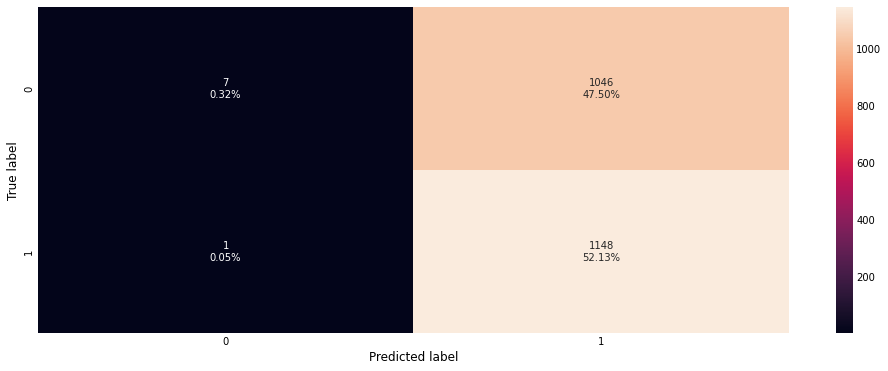

<IPython.core.display.Javascript object>

In [214]:
confusion_matrix_sklearn(rf_estimator_weighted, X_train,Y_train)

In [215]:
# Training Performance Measures
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_estimator_weighted, X_train,Y_train)
print("Training performance \n")
rf_wt_model_train_perf

Training performance 



,Accuracy,Recall,Precision,F1
0,0.52,1.00,0.52,0.69


<IPython.core.display.Javascript object>

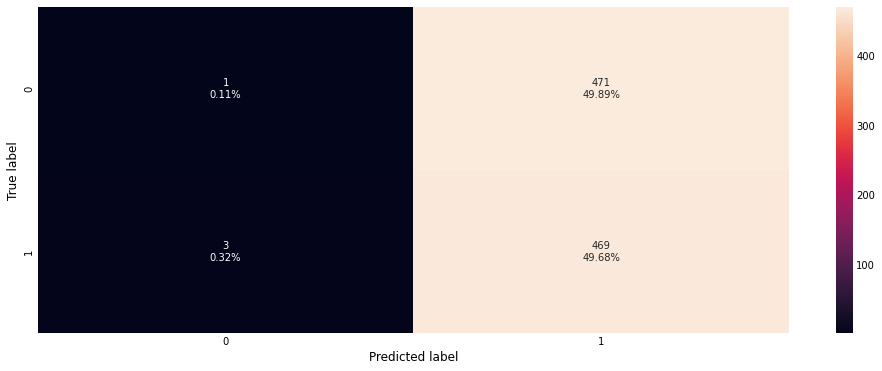

<IPython.core.display.Javascript object>

In [216]:
confusion_matrix_sklearn(rf_estimator_weighted, X_test,Y_test)

In [217]:
# Testing Performance Measures
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_estimator_weighted, X_test, Y_test)
print("Testing performance \n")
rf_wt_model_test_perf

Testing performance 



,Accuracy,Recall,Precision,F1
0,0.50,0.99,0.50,0.66


<IPython.core.display.Javascript object>

* Random forest after tuning has given same performance as un-tuned random forest.

## Summary Performance Measures of Bagging Models Train vs Test Models

---



In [218]:
# Performance comparison of Bagging models

bagging_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_perf_test.T,
        rf_estimator_model_train_perf.T,
        rf_estimator_model_test_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_classifier_model_test_perf.T,
    ],
    axis=1,
)
bagging_comp_df.columns = [
    "Decision Tree (train)",
    "Decision Tree (test)",
    "Random Forest (train)",
    "Random Forest (test)",
    "Bagging Classifier (train)",
    "Bagging Classifier (test)",
]
print("Training performance comparison:")
bagging_comp_df

Training performance comparison:


,Decision Tree (train),Decision Tree (test),Random Forest (train),Random Forest (test),Bagging Classifier (train),Bagging Classifier (test)
Accuracy,1.00,0.50,1.00,0.52,0.97,0.51
Recall,1.00,0.55,1.00,0.55,0.96,0.46
Precision,1.00,0.50,1.00,0.52,0.99,0.51
F1,1.00,0.52,1.00,0.53,0.97,0.48


<IPython.core.display.Javascript object>

## Summary Performance Measures of Bagging Models Tuning Train vs Tuning Test Models

---



In [219]:
bagging_tuned_comp_df = pd.concat(
    [
        dtree_estimator_model_train_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_tuned_model_train_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
    ],
    axis=1,
)
bagging_tuned_comp_df.columns = [
    "Decision Tree Tuned(train)",
    "Decision Tree Tuned(test)",    
    "Random Forest Tuned(train)",
    "Random Forest Tuned(test)",    
    "Bagging Classifier Tuned (train)",
    "Bagging Classifier Tuned (test)",
    ]
print("Bagging tuned model performance comparison:")
bagging_tuned_comp_df



Bagging tuned model performance comparison:


,Decision Tree Tuned(train),Decision Tree Tuned(test),Random Forest Tuned(train),Random Forest Tuned(test),Bagging Classifier Tuned (train),Bagging Classifier Tuned (test)
Accuracy,0.52,0.50,0.63,0.52,1.00,0.51
Recall,1.00,1.00,0.86,0.77,1.00,0.56
Precision,0.52,0.50,0.60,0.51,1.00,0.51
F1,0.69,0.67,0.71,0.61,1.00,0.53


<IPython.core.display.Javascript object>

image.png

## Boosting Decision Tree Models

## AdaBoost Classifier

In [220]:
ab_classifier = AdaBoostClassifier(random_state= 1) ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train, Y_train) ## Complete the code to fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

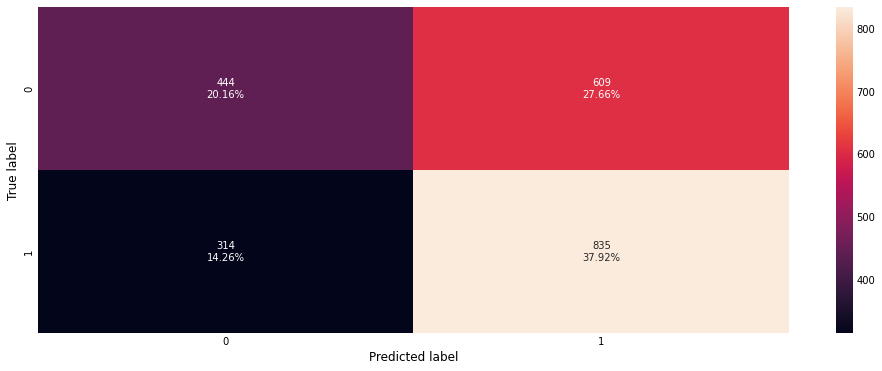

<IPython.core.display.Javascript object>

In [221]:
confusion_matrix_sklearn(ab_classifier, X_train, Y_train) ## Complete the code to create confusion matrix for train data

In [222]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, Y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.58,0.73,0.58,0.64


<IPython.core.display.Javascript object>

#### Checking model performance on test set

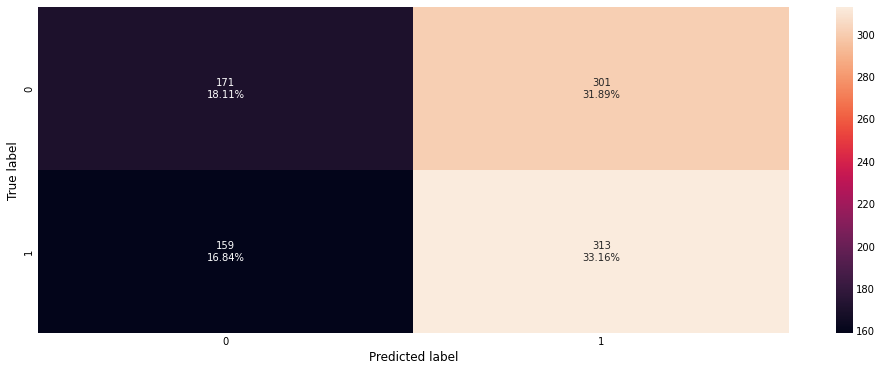

<IPython.core.display.Javascript object>

In [223]:
confusion_matrix_sklearn(ab_classifier, X_test, Y_test) ## Complete the code to create confusion matrix for test data

In [224]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, Y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.51,0.66,0.51,0.58


<IPython.core.display.Javascript object>

- Overfitting is further reduced

- Model performance is similar to that of tuned Random Forest


image.png

### Hyperparameter Tuning - AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [225]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, Y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=70, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

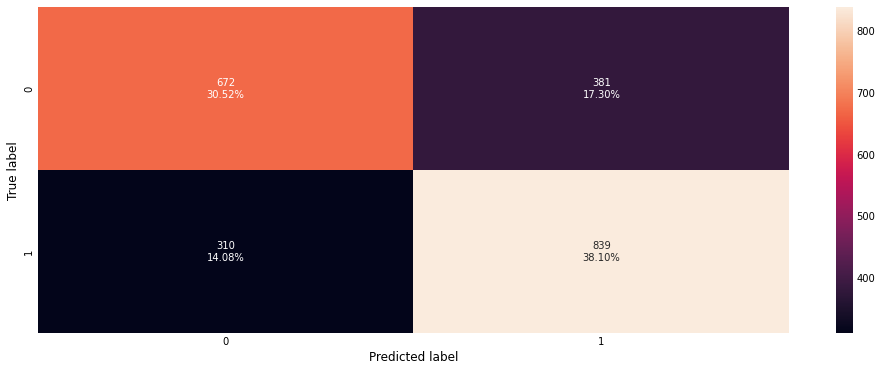

<IPython.core.display.Javascript object>

In [226]:
confusion_matrix_sklearn(abc_tuned, X_train, Y_train)## Complete the code to create confusion matrix for train data on tuned estimator

In [227]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, Y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.69,0.73,0.69,0.71


<IPython.core.display.Javascript object>

#### Checking model performance on test set

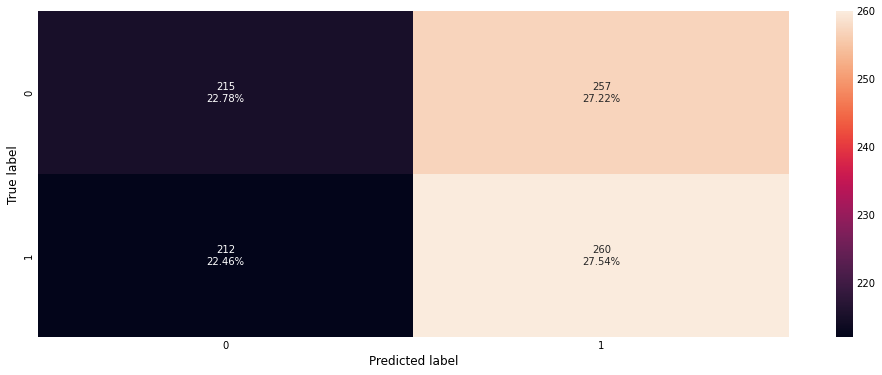

<IPython.core.display.Javascript object>

In [228]:
confusion_matrix_sklearn(abc_tuned, X_test, Y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [229]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, Y_test) ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.50,0.55,0.50,0.53


<IPython.core.display.Javascript object>

 - Tuning reduces over fitting 

 - Precision is improved but F1 is reduced

## Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

In [230]:
gb_classifier = GradientBoostingClassifier(random_state= 1) ## Complete the code to define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train, Y_train) ## Complete the code to fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

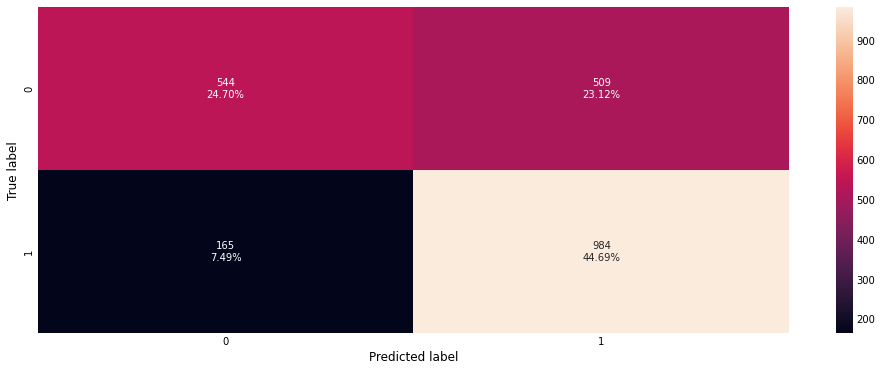

<IPython.core.display.Javascript object>

In [231]:
confusion_matrix_sklearn(gb_classifier, X_train, Y_train) ## Complete the code to create confusion matrix for train data

In [232]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, Y_train) ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.69,0.86,0.66,0.74


<IPython.core.display.Javascript object>

#### Checking model performance on test set

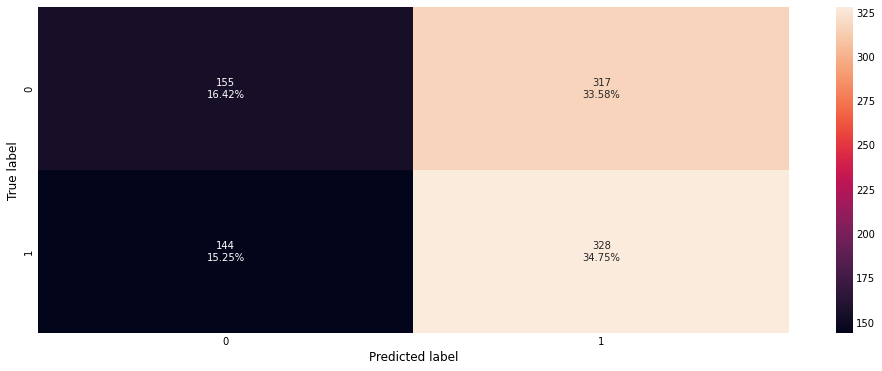

<IPython.core.display.Javascript object>

In [233]:
confusion_matrix_sklearn(gb_classifier, X_test, Y_test) ## Complete the code to create confusion matrix for test data

In [234]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, Y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.51,0.69,0.51,0.59


<IPython.core.display.Javascript object>

- No significant increase in the model performance

image.png

### Hyperparameter Tuning - Gradient Boosting Classifier

In [235]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state= 1)
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250, 300],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, Y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, Y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=200, subsample=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

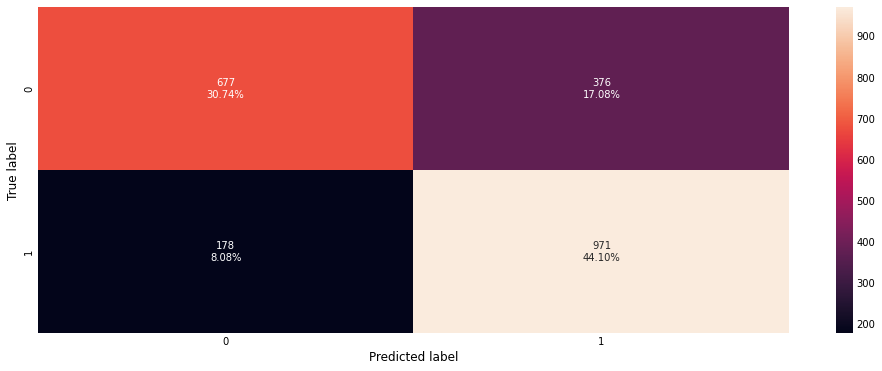

<IPython.core.display.Javascript object>

In [236]:
confusion_matrix_sklearn(gbc_tuned, X_train, Y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [237]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, Y_train) ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75,0.85,0.72,0.78


<IPython.core.display.Javascript object>

#### Checking model performance on test set

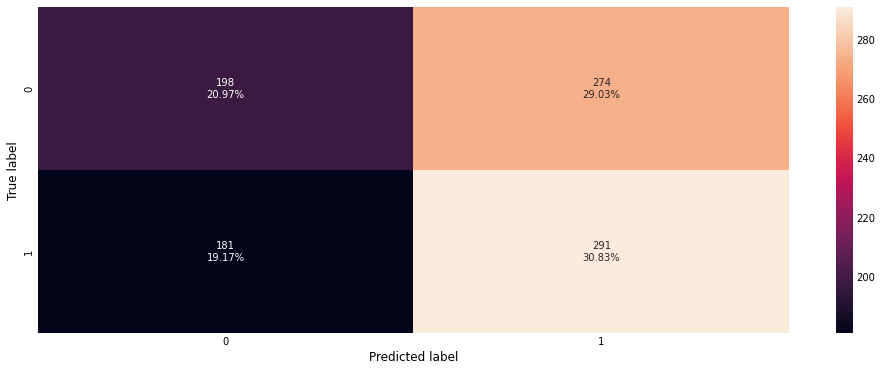

<IPython.core.display.Javascript object>

In [238]:
confusion_matrix_sklearn(gbc_tuned, X_test, Y_test)## Complete the code to create confusion matrix for test data on tuned estimator

In [239]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, Y_test) ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.52,0.62,0.52,0.56


<IPython.core.display.Javascript object>

Performance of Gradient Boster remains the same after hyperparameter tuning

## XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance.  Some of the important parameters are:**

- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.

- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.

- colsample_bytree: Corresponds to the fraction of features (the columns) to use.

- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.

- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.

- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.

- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.

- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [240]:
xgb_classifier = XGBClassifier(random_state = 1) ## Complete the code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train, Y_train) ## Complete the code to fit XGBoost Classifier on the train data

XGBClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

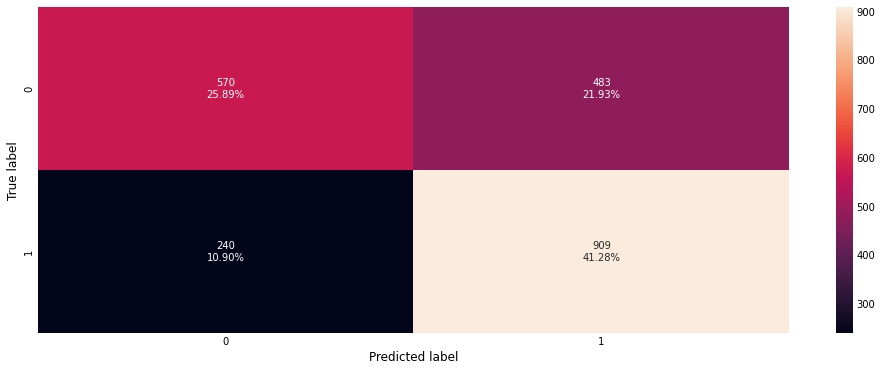

<IPython.core.display.Javascript object>

In [241]:
confusion_matrix_sklearn(xgb_classifier, X_train, Y_train) ## Complete the code to create confusion matrix for train data

In [242]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, Y_train) ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.67,0.79,0.65,0.72


<IPython.core.display.Javascript object>

#### Checking model performance on test set

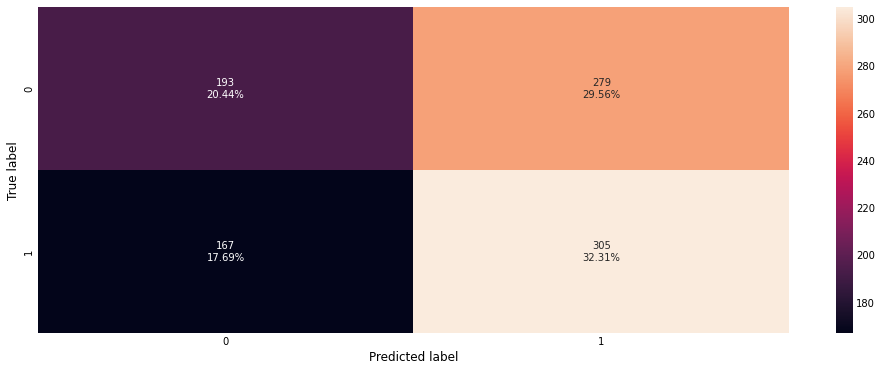

<IPython.core.display.Javascript object>

In [243]:
confusion_matrix_sklearn(xgb_classifier, X_test, Y_test) ## Complete the code to create confusion matrix for test data

In [244]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, Y_test) ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.53,0.65,0.52,0.58


<IPython.core.display.Javascript object>

- xgb_classifier model is slightly overfitting

- Peformance is only slightly lower than hyperparameter tuned Gradient Boosting Classifier

image.png

### Hyperparameter Tuning - XGBoost Classifier

In [245]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
    "gamma": [1, 3, 5],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "colsample_bylevel": [0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, Y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=0.7, eval_metric='logloss', gamma=5,
              n_estimators=150, random_state=1, scale_pos_weight=2)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

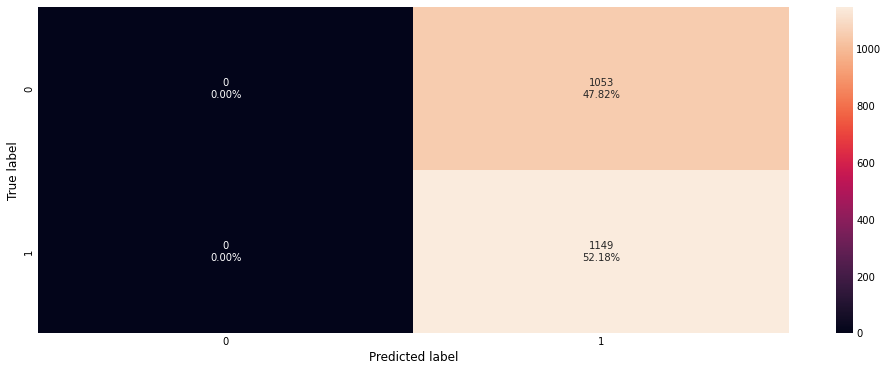

<IPython.core.display.Javascript object>

In [246]:
confusion_matrix_sklearn(xgb_tuned, X_train, Y_train) ## Complete the code to create confusion matrix for train data on tuned estimator

In [247]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, Y_train) ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.52,1.00,0.52,0.69


<IPython.core.display.Javascript object>

#### Checking model performance on test set

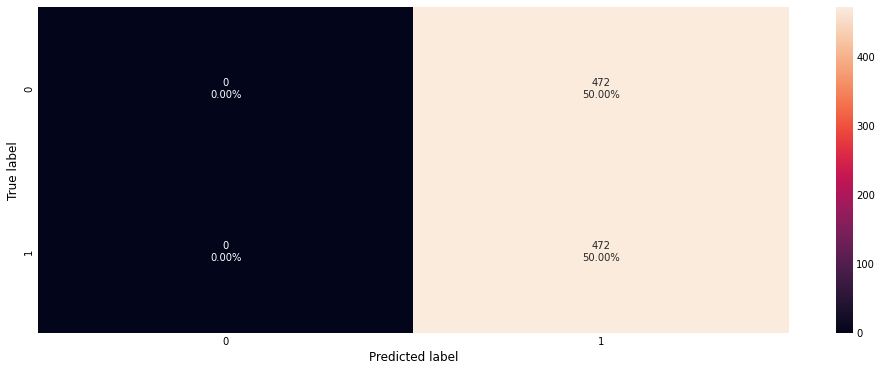

<IPython.core.display.Javascript object>

In [248]:
confusion_matrix_sklearn(xgb_tuned, X_test, Y_test) ## Complete the code to create confusion matrix for test data on tuned estimator

In [249]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, Y_test) ## Complete the code to check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.50,1.00,0.50,0.67


<IPython.core.display.Javascript object>

- Hypeparameter tuning of  XG model reduces overfitting
- The model performance for hypertuned XGBoost is lower than XGBoost

## Stacking Classifier

In [250]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier =  StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5) ## Complete the code to define Stacking Classifier

stacking_classifier.fit(X_train, Y_train) ## Complete the code to fit Stacking Classifier on the train data

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=200,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_es

<IPython.core.display.Javascript object>

#### Checking model performance on training set

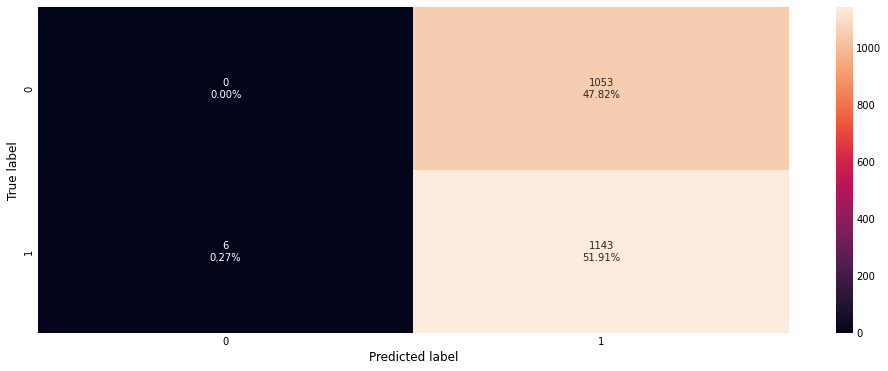

<IPython.core.display.Javascript object>

In [251]:
confusion_matrix_sklearn(stacking_classifier, X_train, Y_train) ## Complete the code to create confusion matrix for train data

In [252]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, Y_train) ## Complete the code to check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.52,0.99,0.52,0.68


<IPython.core.display.Javascript object>

#### Checking model performance on test set

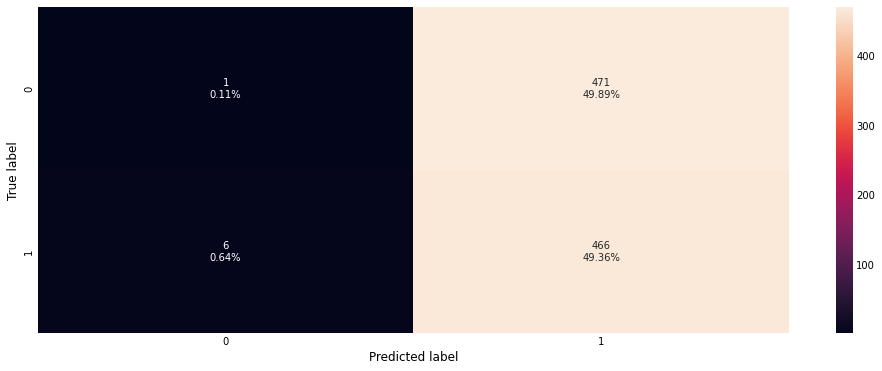

<IPython.core.display.Javascript object>

In [253]:
confusion_matrix_sklearn(stacking_classifier, X_test, Y_test) ## Complete the code to create confusion matrix for test data

In [254]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, Y_test) ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.49,0.99,0.50,0.66


<IPython.core.display.Javascript object>

- Model performance is similar to hypertuned XG Boost

image.png

## Summary Performance Comparison Measures of Boosting Train vs Test

In [255]:
boosting_comp_df = pd.concat(
    [
        ab_classifier_model_train_perf.T,
        ab_classifier_model_test_perf.T,
        gb_classifier_model_train_perf.T,
        gb_classifier_model_test_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_classifier_model_test_perf.T,
    ],
    axis=1,
)

boosting_comp_df.columns = [
    "Adaboost Classifier (train)",
    "Adabosst Classifier (test)",
    "Gradient Boost Classifier (train)",
    "Gradient Boost Classifier (test)",
    "XGBoost Classifier (train)",
    "XGBoost Classifier (test)",
]
print("Boosting performance comparison:")
boosting_comp_df

Boosting performance comparison:


,Adaboost Classifier (train),Adabosst Classifier (test),Gradient Boost Classifier (train),Gradient Boost Classifier (test),XGBoost Classifier (train),XGBoost Classifier (test)
Accuracy,0.58,0.51,0.69,0.51,0.67,0.53
Recall,0.73,0.66,0.86,0.69,0.79,0.65
Precision,0.58,0.51,0.66,0.51,0.65,0.52
F1,0.64,0.58,0.74,0.59,0.72,0.58


<IPython.core.display.Javascript object>

image.png

## Summary Performance Comparison Measures of Boosting Tuned Training vs Tuned Testing

In [256]:
boosting_tuned_comp_df = pd.concat(
    [
        abc_tuned_model_train_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_train_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_tuned_model_train_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_train_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
boosting_tuned_comp_df.columns = [
    "Adaboost Classifier tuned (train)",
    "Adabosst Classifier tuned (test)",
    "Gradient Boost Classifier tuned (train)",
    "Gradient Boost Classifier tuned (test)",
    "XGBoost Classifier tuned (train)",
    "XGBoost Classifier tuned (test)",
    "Stacking Classifier (train)",
    "Stacking Classifier (test)",
]
print("Boosting Tuned performance comparison:")
boosting_tuned_comp_df

Boosting Tuned performance comparison:


,Adaboost Classifier tuned (train),Adabosst Classifier tuned (test),Gradient Boost Classifier tuned (train),Gradient Boost Classifier tuned (test),XGBoost Classifier tuned (train),XGBoost Classifier tuned (test),Stacking Classifier (train),Stacking Classifier (test)
Accuracy,0.69,0.50,0.75,0.52,0.52,0.50,0.52,0.49
Recall,0.73,0.55,0.85,0.62,1.00,1.00,0.99,0.99
Precision,0.69,0.50,0.72,0.52,0.52,0.50,0.52,0.50
F1,0.71,0.53,0.78,0.56,0.69,0.67,0.68,0.66


<IPython.core.display.Javascript object>

image.png

## Summary Performance Measures of all Bagging and Boosting: All Training Models

In [257]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest ",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Classifier Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.00,0.52,1.00,0.63,0.97,1.00,0.58,0.69,0.69,0.75,0.67,0.52,0.52
Recall,1.00,1.00,1.00,0.86,0.96,1.00,0.73,0.73,0.86,0.85,0.79,1.00,0.99
Precision,1.00,0.52,1.00,0.60,0.99,1.00,0.58,0.69,0.66,0.72,0.65,0.52,0.52
F1,1.00,0.69,1.00,0.71,0.97,1.00,0.64,0.71,0.74,0.78,0.72,0.69,0.68


<IPython.core.display.Javascript object>

image.png

## Summary Performance Measures of all Bagging and Boosting: All Testing Models

In [258]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Classifier Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.50,0.50,0.52,0.52,0.51,0.51,0.51,0.50,0.51,0.52,0.53,0.50,0.49
Recall,0.55,1.00,0.55,0.77,0.46,0.56,0.66,0.55,0.69,0.62,0.65,1.00,0.99
Precision,0.50,0.50,0.52,0.51,0.51,0.51,0.51,0.50,0.51,0.52,0.52,0.50,0.50
F1,0.52,0.67,0.53,0.61,0.48,0.53,0.58,0.53,0.59,0.56,0.58,0.67,0.66


<IPython.core.display.Javascript object>

Observations:

* Accuracy appears to be similar in all Bagging and Boosting models and lower in Decision Tree models.

* Recall seems to be the  highest in Tuned Decision Tree Classifier (1.00), followed by Tuned AdaBoost Classifier

* Precision looks similar in all Bagging and Boosting models and slightly lower in Tuned Decision Tree model.

* F1 coefficient appears to be higher in Boosting models than Bagging models. 

* Interestingly, there is virtually no overfitting in AdaBoost and Gradient Boost models (both default and tuned). AdaBoost is very slightly overfitting than Gradient Boost models.


image.png

### Important features of the final selected model
### Selected Model - Tunned Random Forest

## Using Decision Tree for Prediction Diabetes Outcome

In [ ]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

## General Models Observations

* We can see that three variables - Glucose, Age, and BMI are the most important factors in identifying persons who are at risk of diabetes. Other variables' importance is not significant. 
* Once the desired performance is achieved from the model, the company can use it to predict the risk factor of diabetes in new patients. This would help to reduce the cost and increase the efficiency of the process.
* Identifying the risk of diabetes at early stages, especially among pregnant women, can help to control the disease and prevent the second health problem.
* As per the decision tree business rules:
    - Women's glucose level <=127 and age <=28 have a lower risk of diabetes.
    - Women's glucose level >100 and age >28 have a higher risk of diabetes.
    - Women's glucose level >127 and BMI <=28 have a lower risk of diabetes.
* Based on the above analysis, we can say that:
    - Middle-aged to older women has a higher risk of diabetes. They should keep the glucose level in check and take proper precautions.
    - Overweight women have a higher risk of diabetes. They should keep the glucose level in check and exercise regularly. 

___

image.png